# **IMPORT PACKAGE**

In [6]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

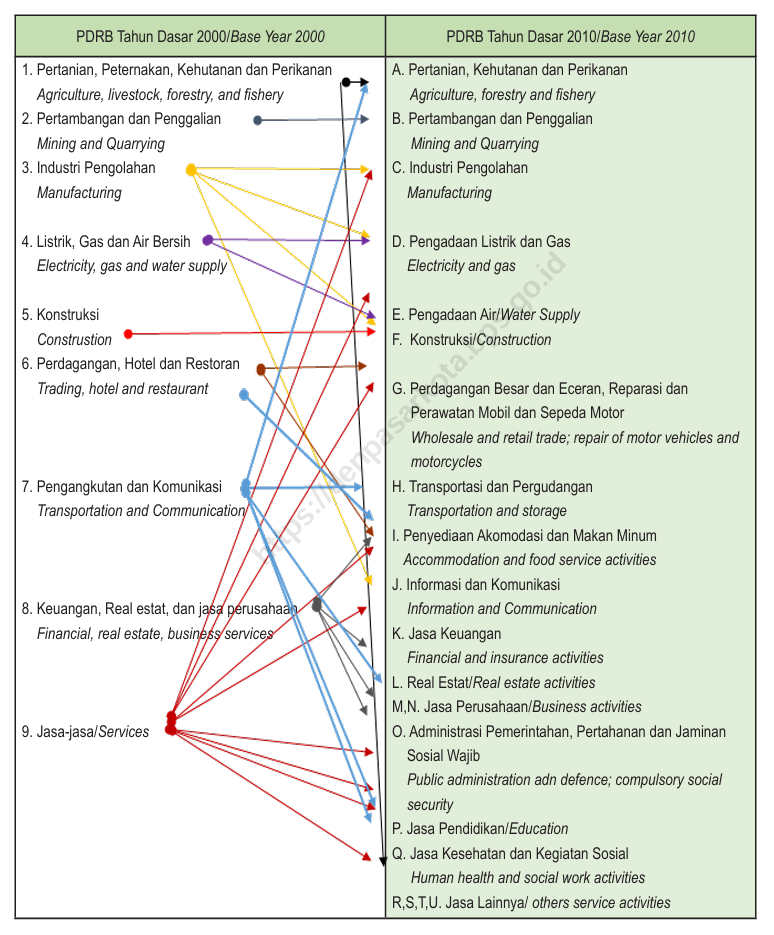

In [ ]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['cabai','bawang','jeruk','sayur','ikan','nelayan','kopi','pertanian','panen','sapi','petani','peternak','padi','jagung','telur','udang','perkebunan','tikus','kedelai','ayam']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [88]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [89]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [ ]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor1_triwulan4_bali.xlsx")
# berita_balipost

Unnamed: 0                                              title  \
0            0  Beras Naik dan Cabai Rawit Turun Jadi Rp43.580...   
1            1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2            2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3            3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
4            4  Diantisipasi, Pelantikan Gubernur Mundur dari ...   
..         ...                                                ...   
66          66                 Pertanian Konservasi Berkelanjutan   
67          67      Disrupsi Digital Pertanian di Era Globalisasi   
68          68  Modernisasi Pertanian Tekan Biaya Hhingga 70 P...   
69          69  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   
70          70           Menjaga Eksistensi Pertanian Bergenerasi   

                                                 link       date    keyword  \
0   https://www.balipost.com/news/2024/10/06/42087... 2024-10-06      cabai   
1   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19     bawang   
2   https://www.balipost.com/news/2024/10/18/42275... 2024-10-18     bawang   
3   https://www.balipost.com/news/2024/10/14/42208... 2024-10-14     bawang   
4   https://www.balipost.com/news/2024/11/10/42666... 2024-11-10       ikan   
..                                                ...        ...        ...   
66  https://www.balipost.com/news/2024/10/18/42269... 2024-10-18  pertanian   
67  https://www.balipost.com/news/2024/10/15/42222... 2024-10-15  pertanian   
68  https://www.balipost.com/news/2024/10/13/42196... 2024-10-13  pertanian   
69  https://www.balipost.com/news/2024/10/12/42189... 2024-10-12  pertanian   
70  https://www.balipost.com/news/2024/10/09/42132... 2024-10-09  pertanian   

      source                                            content  
0   BaliPost  JAKARTA, BALIPOST.com - Sejumlah komoditas pan...  
1   BaliPost  MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
2   BaliPost  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
3   BaliPost  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
4   BaliPost  JAKARTA, BALIPOST.com - Antisipasi dilakukan M...  
..       ...                                                ...  
66  BaliPost  Oleh I Nyoman Sucipta_x000D_\nPengurangan emis...  
67  BaliPost  Oleh Ir. I Wayan Sukarsa, M.M.A._x000D_\nSekto...  
68  BaliPost  JAKARTA, BALIPOST.com - Modernisasi pertanian ...  
69  BaliPost  TABANAN, BALIPOST.com - Dalam kampanye putaran...  
70  BaliPost  Oleh Putu Wirawan Mahayana_x000D_\nBali dalam ...  

[71 rows x 7 columns]

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [91]:
# Keyword to filter out
keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_balipost_2.shape)
berita_balipost_2

(47, 7)


Unnamed: 0                                              title  \
1            1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2            2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3            3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
6            6  Kementerian Kebudayaan Deklarasikan Penguatan ...   
7            7  Lestarikan Tradisi, Koster Megibung bersama Wa...   
8            8  Bali Dijadikan Role Model Pengembangan Pariwis...   
9            9  Dapur Restoran di Sanur Terbakar, Seorang Kary...   
10          10  Srikandi Astaguna Tebar Kasih di Panti Asuhan ...   
12          12  Donald Trump Menangi Pilpres AS, Simak Fakta d...   
13          13  Promosikan Judi Online, Selebgram Divonis 9 Bu...   
14          14    Bali Tak Perlu Dijadikan Replika Destinasi Lain   
16          16  Wujudkan Kecerdasan dan Kemandirian di Klungku...   
17          17  Mengenal Tari Rejang Dewa, Tarian Sakral Umat ...   
19          19  Keberadaannya Mulai Langka, 7 Alat Musik Bali ...   
20          20  Prabowo Komit Bangun Bandara Bali Utara, Jadik...   
21          21  Pasar Umum Negara Bahagia Sepi, Komisi II Indi...   
22          22  Target Menang di Buduk, Adicipta Siap Realisas...   
25          25  Kapolres Jembrana Pastikan Keamanan Logistik P...   
26          26  Nangun Sat Kerthi Loka Bali: Desa Adat di Taba...   
27          27  Pemerintah Diminta Perhatikan Pasar Senggol di...   
28          28  Sangat Konsen di Dunia Pendidikan, Koster Dini...   
29          29  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
30          30  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
33          33  Tinjau Pertanian Berkelanjutan, Prabowo Kunjun...   
34          34  “Peak Season” Pariwisata Tak Dongkrak Kinerja ...   
35          35  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
36          36  Denpasar Punya Pertanian Abadi, Empat Tahun Me...   
37          37  Kebakaran Bengkel Sparepart Alat Pertanian di ...   
38          38  Nangun Sat Kerthi Loka Bali: Desa Nyambu Bangk...   
42          42  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   
45          45  Nangun Sat Kerthi Loka Bali: Desa Adat Ekasari...   
46          46  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
49          49  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
50          50  NTP Jadi Bahasan di Debat Pilkada, Ini Perband...   
51          51  Nangun Sat Kerthi Loka Bali: Desa Adat Berangb...   
52          52  Lintasi Tanjakan di Landih, Truk Mundur Tabrak...   
53          53  BRI BO Tabanan dan Tabanan Kediri Undi PHS Sem...   
54          54  Nangun Sat Kerthi Loka Bali: Desa Adat Ekasari...   
56          56  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
57          57  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
60          60  Tinjau Pertanian Berkelanjutan, Prabowo Kunjun...   
61          61  “Peak Season” Pariwisata Tak Dongkrak Kinerja ...   
62          62  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
63          63  Denpasar Punya Pertanian Abadi, Empat Tahun Me...   
64          64  Kebakaran Bengkel Sparepart Alat Pertanian di ...   
65          65  Nangun Sat Kerthi Loka Bali: Desa Nyambu Bangk...   
69          69  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   

                                                 link       date     keyword  \
1   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19      bawang   
2   https://www.balipost.com/news/2024/10/18/42275... 2024-10-18      bawang   
3   https://www.balipost.com/news/2024/10/14/42208... 2024-10-14      bawang   
6   https://www.balipost.com/news/2024/11/09/42652... 2024-11-09        ikan   
7   https://www.balipost.com/news/2024/11/09/42652... 2024-11-09        ikan   
8   https://www.balipost.com/news/2024/11/08/42640... 2024-11-08        ikan   
9   https://www.balipost.com/news/2024/11/08/42638... 2024-11-08        ikan   
10  https://www.balipost.com/news/2024/11/08/42637.

In [92]:
# Build the regular expression pattern with word boundaries
pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# Show the filtered DataFrame
print(berita_balipost_3.shape)
berita_balipost_3

(25, 7)


C:\Users\asus\AppData\Local\Temp\ipykernel_7796\1069968203.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]


Unnamed: 0                                              title  \
1            1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2            2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3            3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
29          29  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
30          30  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
33          33  Tinjau Pertanian Berkelanjutan, Prabowo Kunjun...   
34          34  “Peak Season” Pariwisata Tak Dongkrak Kinerja ...   
35          35  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
36          36  Denpasar Punya Pertanian Abadi, Empat Tahun Me...   
37          37  Kebakaran Bengkel Sparepart Alat Pertanian di ...   
38          38  Nangun Sat Kerthi Loka Bali: Desa Nyambu Bangk...   
42          42  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   
45          45  Nangun Sat Kerthi Loka Bali: Desa Adat Ekasari...   
46          46  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
49          49  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
54          54  Nangun Sat Kerthi Loka Bali: Desa Adat Ekasari...   
56          56  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
57          57  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
60          60  Tinjau Pertanian Berkelanjutan, Prabowo Kunjun...   
61          61  “Peak Season” Pariwisata Tak Dongkrak Kinerja ...   
62          62  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
63          63  Denpasar Punya Pertanian Abadi, Empat Tahun Me...   
64          64  Kebakaran Bengkel Sparepart Alat Pertanian di ...   
65          65  Nangun Sat Kerthi Loka Bali: Desa Nyambu Bangk...   
69          69  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   

                                                 link       date     keyword  \
1   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19      bawang   
2   https://www.balipost.com/news/2024/10/18/42275... 2024-10-18      bawang   
3   https://www.balipost.com/news/2024/10/14/42208... 2024-10-14      bawang   
29  https://www.balipost.com/news/2024/11/09/42645... 2024-11-09   pertanian   
30  https://www.balipost.com/news/2024/11/08/42636... 2024-11-08   pertanian   
33  https://www.balipost.com/news/2024/11/03/42545... 2024-11-03   pertanian   
34  https://www.balipost.com/news/2024/11/02/42539... 2024-11-02   pertanian   
35  https://www.balipost.com/news/2024/10/29/42469... 2024-10-29   pertanian   
36  https://www.balipost.com/news/2024/10/29/42462... 2024-10-29   pertanian   
37  https://www.balipost.com/news/2024/10/27/42431... 2024-10-27   pertanian   
38  https://www.balipost.com/news/2024/10/21/42321... 2024-10-21   pertanian   
42  https://www.balipost.com/news/2024/10/12/42189... 2024-10-12   pertanian   
45  https://www.balipost.com/news/2024/10/10/42143... 2024-10-10        sapi   
46  https://www.balipost.com/news/2024/11/08/42636... 2024-11-08  perkebunan   
49  https://www.balipost.com/news/2024/10/29/42469... 2024-10-29  perkebunan   
54  https://www.balipost.com/news/2024/10/10/42143... 2024-10-10  perkebunan   
56  https://www.balipost.com/news/2024/11/09/42645... 2024-11-09   pertanian   
57  https://www.balipost.com/news/2024/11/08/42636... 2024-11-08   pertanian   
60  https://www.balipost.com/news/2024/11/03/42545... 2024-11-03   pertanian   
61  https://www.balipost.com/news/2024/11/02/42539... 2024-11-02   pertanian   
62  https://www.balipost.com/news/2024/10/29/42469... 2024-10-29   pertanian   
63  https://www.balipost.com/news/2024/10/29/42462... 2024-10-29   pertanian   
64  https://www.balipost.com/news/2024/10/27/42431... 2024-10-27   pertanian   
65  https://www.balipost.com/news/2024/10/21/42321... 2024-10-21   pertanian   
69  https://www.balipost.com/news/2024/10/12/42189... 2024-10-12   pertanian   

      source                                            content  
1   BaliPost  MANGUPURA, BALIPOST.com - Budidaya bawang mera..

In [93]:
# Remove Duplication
berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
print(berita_balipost_3.shape)
berita_balipost_3

(13, 7)


Unnamed: 0                                              title  \
1            1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2            2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3            3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
29          29  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
30          30  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
33          33  Tinjau Pertanian Berkelanjutan, Prabowo Kunjun...   
34          34  “Peak Season” Pariwisata Tak Dongkrak Kinerja ...   
35          35  Dukungan di Selemadeg Barat Menguat, Sanjaya-D...   
36          36  Denpasar Punya Pertanian Abadi, Empat Tahun Me...   
37          37  Kebakaran Bengkel Sparepart Alat Pertanian di ...   
38          38  Nangun Sat Kerthi Loka Bali: Desa Nyambu Bangk...   
42          42  Sanjaya-Dirga Tegaskan Komitmen Jaga Pertanian...   
45          45  Nangun Sat Kerthi Loka Bali: Desa Adat Ekasari...   

                                                 link       date    keyword  \
1   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19     bawang   
2   https://www.balipost.com/news/2024/10/18/42275... 2024-10-18     bawang   
3   https://www.balipost.com/news/2024/10/14/42208... 2024-10-14     bawang   
29  https://www.balipost.com/news/2024/11/09/42645... 2024-11-09  pertanian   
30  https://www.balipost.com/news/2024/11/08/42636... 2024-11-08  pertanian   
33  https://www.balipost.com/news/2024/11/03/42545... 2024-11-03  pertanian   
34  https://www.balipost.com/news/2024/11/02/42539... 2024-11-02  pertanian   
35  https://www.balipost.com/news/2024/10/29/42469... 2024-10-29  pertanian   
36  https://www.balipost.com/news/2024/10/29/42462... 2024-10-29  pertanian   
37  https://www.balipost.com/news/2024/10/27/42431... 2024-10-27  pertanian   
38  https://www.balipost.com/news/2024/10/21/42321... 2024-10-21  pertanian   
42  https://www.balipost.com/news/2024/10/12/42189... 2024-10-12  pertanian   
45  https://www.balipost.com/news/2024/10/10/42143... 2024-10-10       sapi   

      source                                            content  
1   BaliPost  MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
2   BaliPost  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
3   BaliPost  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
29  BaliPost  MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
30  BaliPost  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
33  BaliPost  DENPASAR, BALIPOST. com - Guna meninjau pengem...  
34  BaliPost  DENPASAR, BALIPOST.com - Pada periode peak sea...  
35  BaliPost  TABANAN, BALIPOST.com - Dukungan masyarakat Ta...  
36  BaliPost  DENPASAR, BALIPOST.com - Presiden RI Prabowo S...  
37  BaliPost  MANGUPURA, BALIPOST.com - Warga Banjar Sidan, ...  
38  BaliPost  TABANAN, BALIPOST.com - Desa Nyambu, Kecamatan...  
42  BaliPost  TABANAN, BALIPOST.com - Dalam kampanye putaran...  
45  BaliPost  NEGARA, BALIPOST.com - Desa Adat Ekasari merup...

## 2. DetikBali

In [94]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [ ]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: cabai
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=cabai&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=cabai&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=cabai&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci cabai: 11 artikel.

Memulai Scrapping dari DetikBali untuk keyword: bawang
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=bawang&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=bawang&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=

title keyword     source  \
0    Mencicipi Pencok Beras, Sambal Khas Karangasem...   cabai  detikBali   
1    Harga Bahan Pokok di GPM Mataram: Beras Rp 11....   cabai  detikBali   
2    Serunya Nongkrong Bareng Anabul di Kafe Ramah ...   cabai  detikBali   
3    Jokowi Temukan Harga Bahan Pokok di Alor Lebih...   cabai  detikBali   
4    Resep Sayur Ares Khas Lombok, Dimasak Selama 2...   cabai  detikBali   
..                                                 ...     ...        ...   
336  Jadi Syarat Ekspor, Pemprov NTB Dorong Pengusa...    ayam  detikBali   
337  Cara Alami Menurunkan Kolesterol dan Makanan y...    ayam  detikBali   
338  Jadwal Hari Raya Hindu Bulan Oktober 2024 Menu...    ayam  detikBali   
339  Mengenal Tari Barong Brutuk yang Hanya Ada di ...    ayam  detikBali   
340       Pemain Tunggal Sleeper Bus Rute Bima-Mataram    ayam  detikBali   

                                                  link  \
0    https://www.detik.com/bali/kuliner/d-7631994/m...   
1    https://www.detik.com/bali/bisnis/d-7627248/ha...   
2    https://www.detik.com/bali/wisata/d-7619575/se...   
3    https://www.detik.com/bali/nusra/d-7570356/jok...   
4    https://www.detik.com/bali/kuliner/d-7571453/r...   
..                                                 ...   
336  https://www.detik.com/bali/bisnis/d-7609595/ja...   
337  https://www.detik.com/bali/berita/d-7569375/ca...   
338  https://www.detik.com/bali/berita/d-7567556/ja...   
339  https://www.detik.com/bali/budaya/d-7607837/me...   
340  https://www.detik.com/bali/bisnis/d-7578453/pe...   

                              date  \
0     Senin, 11 Nov 2024 00:30 WIB   
1     Kamis, 07 Nov 2024 16:11 WIB   
2    Minggu, 03 Nov 2024 08:24 WIB   
3     Kamis, 03 Okt 2024 15:27 WIB   
4     Jumat, 04 Okt 2024 10:02 WIB   
..                             ...   
336   Senin, 28 Okt 2024 09:06 WIB   
337   Kamis, 03 Okt 2024 00:30 WIB   
338    Rabu, 02 Okt 2024 03:30 WIB   
339  Minggu, 27 Okt 2024 01:30 WIB   
340  Selasa, 08 Okt 2024 20:15 WIB   

                                               content  
0    Masyarakat Kabupaten Karangasem, Bali, memilik...  
1    Sebanyak tiga ton beras stabilisasi pasokan da...  
2    Kafe sebagai tempat nongkrong berjamuran di De...  
3    Presiden Joko Widodo (Jokowi) meninjau Pasar R...  
4    Pulau Lombok memiliki olahan sayuran unik yang...  
..                                                 ...  
336  Pemerintah Provinsi (Pemprov) Nusa Tenggara Ba...  
337  Kolesterol adalah masalah kesehatan yang banya...  
338  Selama bulan Oktober 2024, terdapat sepuluh re...  
339  Desa Trunyan di Kecamatan Kintamani, Bangli, B...  
340  Sudah dua kali Usman Har naik bus New Surabaya...  

[341 rows x 6 columns]

Pre-cleaning

In [96]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(121, 6)


title keyword     source  \
0    Mencicipi Pencok Beras, Sambal Khas Karangasem...   cabai  detikBali   
2    Serunya Nongkrong Bareng Anabul di Kafe Ramah ...   cabai  detikBali   
5      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   cabai  detikBali   
7    Cara Unik Menikmati Piza Bebek di Emperan Ruko...   cabai  detikBali   
8    Inflasi Bali Lebih Tinggi dari Nasional, Penge...   cabai  detikBali   
..                                                 ...     ...        ...   
325  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...    ayam  detikBali   
328  Serunya Nongkrong Bareng Anabul di Kafe Ramah ...    ayam  detikBali   
332  Cara Unik Menikmati Piza Bebek di Emperan Ruko...    ayam  detikBali   
333  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...    ayam  detikBali   
339  Mengenal Tari Barong Brutuk yang Hanya Ada di ...    ayam  detikBali   

                                                  link  \
0    https://www.detik.com/bali/kuliner/d-7631994/m...   
2    https://www.detik.com/bali/wisata/d-7619575/se...   
5    https://www.detik.com/bali/bisnis/d-7617202/ke...   
7    https://www.detik.com/bali/kuliner/d-7574187/c...   
8    https://www.detik.com/bali/bisnis/d-7569265/in...   
..                                                 ...   
325  https://www.detik.com/bali/bisnis/d-7571586/ha...   
328  https://www.detik.com/bali/wisata/d-7619575/se...   
332  https://www.detik.com/bali/kuliner/d-7574187/c...   
333  https://www.detik.com/bali/hukum-dan-kriminal/...   
339  https://www.detik.com/bali/budaya/d-7607837/me...   

                              date  \
0     Senin, 11 Nov 2024 00:30 WIB   
2    Minggu, 03 Nov 2024 08:24 WIB   
5     Jumat, 01 Nov 2024 13:27 WIB   
7    Minggu, 06 Okt 2024 09:19 WIB   
8      Rabu, 02 Okt 2024 20:50 WIB   
..                             ...   
325   Jumat, 04 Okt 2024 11:13 WIB   
328  Minggu, 03 Nov 2024 08:24 WIB   
332  Minggu, 06 Okt 2024 09:19 WIB   
333   Kamis, 10 Okt 2024 11:18 WIB   
339  Minggu, 27 Okt 2024 01:30 WIB   

                                               content  
0    Masyarakat Kabupaten Karangasem, Bali, memilik...  
2    Kafe sebagai tempat nongkrong berjamuran di De...  
5    Badan Pusat Statistik (BPS) Provinsi Bali menc...  
7    Warung di pinggir jalan kini tak hanya menjual...  
8    Badan Pusat Statistik (BPS) mencatat perkemban...  
..                                                 ...  
325  Penampahan Kuningan (sehari menjelang Hari Ray...  
328  Kafe sebagai tempat nongkrong berjamuran di De...  
332  Warung di pinggir jalan kini tak hanya menjual...  
333  Pelaku pencurian kendaraan bermotor (curanmor)...  
339  Desa Trunyan di Kecamatan Kintamani, Bangli, B...  

[121 rows x 6 columns]

In [97]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(36, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_7796\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title    keyword     source  \
13   Duduk Perkara 254 Pekerja PLTU Celukan Bawang ...     bawang  detikBali   
15   Perusahaan PLTU Celukan Bawang Bantah Larang P...     bawang  detikBali   
16   Karyawan PLTU Celukan Bawang Laporkan Direksi ...     bawang  detikBali   
19   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...     bawang  detikBali   
33   Dari Ladang ke Ruang Lipat: Cerita Petani Klun...     bawang  detikBali   
39   Soto Sapi Pak Made, Aroma Rempah Mengingatkan ...      jeruk  detikBali   
57   Dinas Perikanan Badung Bagikan 150 Paket Olaha...       ikan  detikBali   
66   Nelayan Kedonganan Minta Suyasa Beri Kemudahan...       ikan  detikBali   
82   Nelayan Kedonganan Minta Suyasa Beri Kemudahan...    nelayan  detikBali   
85   Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...    nelayan  detikBali   
89   Pemkab Jembrana Jamin Perlindungan Nelayan den...    nelayan  detikBali   
106  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...       kopi  detikBali   
109  Pramugari Pramugara Sleeper Bus: Membuatkan Ko...       kopi  detikBali   
115  Pemkab Badung Beberkan Rencana Beri Insentif P...       kopi  detikBali   
131  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...  pertanian  detikBali   
132  DPRD Tabanan Minta Setop Pembangunan Vila di L...  pertanian  detikBali   
136  Atasi Ketimpangan Ekonomi, Suyadinata Akan Per...  pertanian  detikBali   
137  FAO Tetapkan Budi Daya Salak Sibetan Jadi 'War...  pertanian  detikBali   
152  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...  pertanian  detikBali   
155  Pemkab Badung Beberkan Rencana Beri Insentif P...  pertanian  detikBali   
158  Hore! Tahun 2025 Petani di Jembrana Tak Perlu ...      panen  detikBali   
162  Pemkab Badung Beberkan Rencana Beri Insentif P...      panen  detikBali   
165  Tingkatkan Produksi Beras, Distan Karangasem A...      panen  detikBali   
169  Dari Ladang ke Ruang Lipat: Cerita Petani Klun...      panen  detikBali   
170  Atasi Ketimpangan Ekonomi, Suyadinata Akan Per...      panen  detikBali   
176  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...       sapi  detikBali   
178  Soto Sapi Pak Made, Aroma Rempah Mengingatkan ...       sapi  detikBali   
179  Suka-Duka Sopir Bus Malam: Dapat Hadiah dari Y...       sapi  detikBali   
199  Kakarsana Janji Hidupkan Program Simantri untu...       sapi  detikBali   
204  Pemkab Badung Beberkan Rencana Beri Insentif P...     petani  detikBali   
205  Dari Ladang ke Ruang Lipat: Cerita Petani Klun...     petani  detikBali   
207  Hore! Tahun 2025 Petani di Jembrana Tak Perlu ...     petani  detikBali   
209  Adi Arnawa Pamer Program Pembelian Gabah Petan...     petani  detikBali   
225  Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...   peternak  detikBali   
240  Tingkatkan Produksi Beras, Distan Karangasem A...       padi  detikBali   
254  Hore! Tahun 2025 Petani di Jembrana Tak Perlu ...       padi  detikBali   

                                                  link  \
13   https://www.detik.com/bali/hukum-dan-kriminal/...   
15   https://www.detik.com/bali/hukum-dan-kriminal/...   
16   https://www.detik.com/bali/hukum-dan-kriminal/...   
19   https://www.detik.com/bali/pilkada/d-7630734/s...   
33   https://www.detik.com/bali/pilkada/d-7617816/d...   
39   https://www.detik.com/bali/kuliner/d-7609291/s...   
57   https://www.detik.com/bali/berita/d-7582197/di...   
66   https://www.detik.com/bali/pilkada/d-7620663/n...   
82   https://www.detik.com/bali/pilkada/d-7620663/n...   
85   https://www.detik.com/bali/pilkada/d-7608726/g...   
89   https://www.detik.com/bali/berita/d-7595319/pe...   
106  https://www.detik.com/bali/pilkada/d-7630734/s...   
109  https://www.detik.com/bali/bisnis/d-7581276/pr...   
115  https://www.detik.com/bali/berita/d-7627813/pe...   
131  https://www.detik.com/bali/pilkada/d-7616364/m...   
132  https://www.detik.com/bali/berita/d-7616741/dp...   
136  https://www.detik.com/bali/pilkada/d-7606687/a...   
137  https://www.detik.com/bali/berita/d-756

Menghapus berita yang duplikat

In [98]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(21, 6)


title    keyword     source  \
13   Duduk Perkara 254 Pekerja PLTU Celukan Bawang ...     bawang  detikBali   
15   Perusahaan PLTU Celukan Bawang Bantah Larang P...     bawang  detikBali   
16   Karyawan PLTU Celukan Bawang Laporkan Direksi ...     bawang  detikBali   
19   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...     bawang  detikBali   
33   Dari Ladang ke Ruang Lipat: Cerita Petani Klun...     bawang  detikBali   
39   Soto Sapi Pak Made, Aroma Rempah Mengingatkan ...      jeruk  detikBali   
57   Dinas Perikanan Badung Bagikan 150 Paket Olaha...       ikan  detikBali   
66   Nelayan Kedonganan Minta Suyasa Beri Kemudahan...       ikan  detikBali   
85   Gus Par-Pandu Janji Turunkan Tarif Air PDAM, P...    nelayan  detikBali   
89   Pemkab Jembrana Jamin Perlindungan Nelayan den...    nelayan  detikBali   
109  Pramugari Pramugara Sleeper Bus: Membuatkan Ko...       kopi  detikBali   
115  Pemkab Badung Beberkan Rencana Beri Insentif P...       kopi  detikBali   
131  Mulyadi-Ardika Gerakkan UMKM dari Sektor Perta...  pertanian  detikBali   
132  DPRD Tabanan Minta Setop Pembangunan Vila di L...  pertanian  detikBali   
136  Atasi Ketimpangan Ekonomi, Suyadinata Akan Per...  pertanian  detikBali   
137  FAO Tetapkan Budi Daya Salak Sibetan Jadi 'War...  pertanian  detikBali   
158  Hore! Tahun 2025 Petani di Jembrana Tak Perlu ...      panen  detikBali   
165  Tingkatkan Produksi Beras, Distan Karangasem A...      panen  detikBali   
179  Suka-Duka Sopir Bus Malam: Dapat Hadiah dari Y...       sapi  detikBali   
199  Kakarsana Janji Hidupkan Program Simantri untu...       sapi  detikBali   
209  Adi Arnawa Pamer Program Pembelian Gabah Petan...     petani  detikBali   

                                                  link  \
13   https://www.detik.com/bali/hukum-dan-kriminal/...   
15   https://www.detik.com/bali/hukum-dan-kriminal/...   
16   https://www.detik.com/bali/hukum-dan-kriminal/...   
19   https://www.detik.com/bali/pilkada/d-7630734/s...   
33   https://www.detik.com/bali/pilkada/d-7617816/d...   
39   https://www.detik.com/bali/kuliner/d-7609291/s...   
57   https://www.detik.com/bali/berita/d-7582197/di...   
66   https://www.detik.com/bali/pilkada/d-7620663/n...   
85   https://www.detik.com/bali/pilkada/d-7608726/g...   
89   https://www.detik.com/bali/berita/d-7595319/pe...   
109  https://www.detik.com/bali/bisnis/d-7581276/pr...   
115  https://www.detik.com/bali/berita/d-7627813/pe...   
131  https://www.detik.com/bali/pilkada/d-7616364/m...   
132  https://www.detik.com/bali/berita/d-7616741/dp...   
136  https://www.detik.com/bali/pilkada/d-7606687/a...   
137  https://www.detik.com/bali/berita/d-7569350/fa...   
158  https://www.detik.com/bali/berita/d-7580449/ho...   
165  https://www.detik.com/bali/berita/d-7571998/ti...   
179  https://www.detik.com/bali/bisnis/d-7580314/su...   
199  https://www.detik.com/bali/pilkada/d-7587740/k...   
209  https://www.detik.com/bali/pilkada/d-7606669/a...   

                              date  \
13     Rabu, 02 Okt 2024 17:59 WIB   
15    Kamis, 03 Okt 2024 16:34 WIB   
16     Rabu, 02 Okt 2024 16:08 WIB   
19    Sabtu, 09 Nov 2024 22:55 WIB   
33    Jumat, 01 Nov 2024 17:36 WIB   
39   Minggu, 27 Okt 2024 21:20 WIB   
57    Kamis, 10 Okt 2024 20:28 WIB   
66   Minggu, 03 Nov 2024 22:56 WIB   
85   Minggu, 27 Okt 2024 15:09 WIB   
89    Jumat, 18 Okt 2024 21:54 WIB   
109   Kamis, 10 Okt 2024 14:45 WIB   
115   Kamis, 07 Nov 2024 22:01 WIB   
131   Kamis, 31 Okt 2024 19:53 WIB   
132   Jumat, 01 Nov 2024 08:44 WIB   
136   Jumat, 25 Okt 2024 19:41 WIB   
137    Rabu, 02 Okt 2024 22:10 WIB   
158    Rabu, 09 Okt 2024 21:26 WIB   
165   Jumat, 04 Okt 2024 14:48 WIB   
179    Rabu, 09 Okt 2024 19:44 WIB   
199   Senin, 14 Okt 2024 18:37 WIB   
209   Jumat, 25 Okt 2024 19:27 WIB   

                                               content  
13   Sebanyak 254 pekerja di Pembangkit Listrik Ten...  
15   PT General Energi Bali (GEB), perusahaan pemba...  
16 

## 3. RadarBali

In [99]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: cabai
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=cabai&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=cabai&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=cabai&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=cabai&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=cabai&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'cabai': 1

Memulai scrapping RadarBali untuk keyword: bawang
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=bawang&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=bawang&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=bawang&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=bawang&sort=latest&p

In [100]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title     keyword     source  \
0   Polres Tabanan Garap Lahan, Tebar Benih Ikan N...       cabai  RadarBali   
1   Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...      bawang  RadarBali   
2   Pj. Sekda Badung Panen Bawang Merah di Subak D...      bawang  RadarBali   
3   Musibah Maut di Jalur Tengkorak Gegara Jalanan...      bawang  RadarBali   
4   Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...      bawang  RadarBali   
..                                                ...         ...        ...   
95  Kurang 3 Tahun, Produksi Kakao Jembrana Mening...  perkebunan  RadarBali   
96  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan  RadarBali   
97  Tak Terkelola dengan Baik, Aset Tanah Perkebun...  perkebunan  RadarBali   
98  Hasil Riset Kelompok Mahasiswa Universitas Sum...  perkebunan  RadarBali   
99  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  perkebunan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/tabanan/70528225...   
1   https://radarbali.jawapos.com/buleleng/7051973...   
2   https://radarbali.jawapos.com/badung/705195871...   
3   https://radarbali.jawapos.com/tabanan/70517825...   
4   https://radarbali.jawapos.com/buleleng/7051589...   
..                                                ...   
95  https://radarbali.jawapos.com/jembrana/7052532...   
96  https://radarbali.jawapos.com/politika/7052323...   
97  https://radarbali.jawapos.com/tabanan/70520974...   
98  https://radarbali.jawapos.com/pendidikan/70516...   
99  https://radarbali.jawapos.com/ekonomi/70515979...   

                                   date              content  
0     Rabu, 6 November 2024 | 16:50 WIB              Tabanan  
1   Selasa, 15 Oktober 2024 | 10:25 WIB             Buleleng  
2    Senin, 14 Oktober 2024 | 18:13 WIB               Badung  
3      Rabu, 9 Oktober 2024 | 20:37 WIB              Tabanan  
4     Jumat, 4 Oktober 2024 | 12:50 WIB             Buleleng  
..                                  ...                  ...  
95    Rabu, 30 Oktober 2024 | 05:55 WIB             Jembrana  
96   Kamis, 24 Oktober 2024 | 10:09 WIB             Politika  
97   Jumat, 18 Oktober 2024 | 14:35 WIB              Tabanan  
98    Jumat, 4 Oktober 2024 | 21:46 WIB           Pendidikan  
99    Jumat, 4 Oktober 2024 | 10:48 WIB  Ekonomi & Perbankan  

[100 rows x 6 columns]

In [101]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(83, 6)


title     keyword     source  \
0   Polres Tabanan Garap Lahan, Tebar Benih Ikan N...       cabai  RadarBali   
1   Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...      bawang  RadarBali   
2   Pj. Sekda Badung Panen Bawang Merah di Subak D...      bawang  RadarBali   
3   Musibah Maut di Jalur Tengkorak Gegara Jalanan...      bawang  RadarBali   
4   Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...      bawang  RadarBali   
..                                                ...         ...        ...   
92  Seraya Culture Festival 2024 : Produk Jagung B...      jagung  RadarBali   
94  Krama Subak di Ringdikit Sampaikan Aspirasi Pe...  perkebunan  RadarBali   
95  Kurang 3 Tahun, Produksi Kakao Jembrana Mening...  perkebunan  RadarBali   
96  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan  RadarBali   
99  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...  perkebunan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/tabanan/70528225...   
1   https://radarbali.jawapos.com/buleleng/7051973...   
2   https://radarbali.jawapos.com/badung/705195871...   
3   https://radarbali.jawapos.com/tabanan/70517825...   
4   https://radarbali.jawapos.com/buleleng/7051589...   
..                                                ...   
92  https://radarbali.jawapos.com/berita-daerah/70...   
94  https://radarbali.jawapos.com/politika/7052993...   
95  https://radarbali.jawapos.com/jembrana/7052532...   
96  https://radarbali.jawapos.com/politika/7052323...   
99  https://radarbali.jawapos.com/ekonomi/70515979...   

                                   date              content  
0     Rabu, 6 November 2024 | 16:50 WIB              Tabanan  
1   Selasa, 15 Oktober 2024 | 10:25 WIB             Buleleng  
2    Senin, 14 Oktober 2024 | 18:13 WIB               Badung  
3      Rabu, 9 Oktober 2024 | 20:37 WIB              Tabanan  
4     Jumat, 4 Oktober 2024 | 12:50 WIB             Buleleng  
..                                  ...                  ...  
92   Senin, 21 Oktober 2024 | 17:40 WIB        Berita Daerah  
94  Senin, 11 November 2024 | 13:15 WIB             Politika  
95    Rabu, 30 Oktober 2024 | 05:55 WIB             Jembrana  
96   Kamis, 24 Oktober 2024 | 10:09 WIB             Politika  
99    Jumat, 4 Oktober 2024 | 10:48 WIB  Ekonomi & Perbankan  

[83 rows x 6 columns]

In [102]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(60, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_7796\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title     keyword     source  \
0   Polres Tabanan Garap Lahan, Tebar Benih Ikan N...       cabai  RadarBali   
1   Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...      bawang  RadarBali   
2   Pj. Sekda Badung Panen Bawang Merah di Subak D...      bawang  RadarBali   
4   Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...      bawang  RadarBali   
5   Rabu 2 Oktober 2024,  Putusan Banding Kasus Ta...       jeruk  RadarBali   
6   Menu Sarapan Hemat Tanpa Ribet: Cobalah Resep ...       sayur  RadarBali   
7   Sengap Jalan Santai Sambil Berbagi Sayur di Ke...       sayur  RadarBali   
9   Pengastulan Ditargetkan Jadi Sentra Ikan Plong...        ikan  RadarBali   
10  Rayakan Puncak HUT Ke- 15, Direktur PT Primo I...        ikan  RadarBali   
11  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...        ikan  RadarBali   
12  Gerakan Pemilahan Sampah di Kota Denpasar, Des...        ikan  RadarBali   
13  Duh, Mendadak Mesin Kapal Ikan Milik PT.Inti M...        ikan  RadarBali   
14  Nelayan Jembrana Berharap Pengurusan Izin Kapa...        ikan  RadarBali   
15  FKP Universitas Udayana Beri Keterampilan Peng...        ikan  RadarBali   
16    Nelayan Persiapkan  Jaring di Pantai Kedonganan     nelayan  RadarBali   
17  Lirik Potensi Laut Tabanan, Mulyadi-Ardika Cit...     nelayan  RadarBali   
18  Sunrise, Jukung Nelayan di Sanur Berangkat Mem...     nelayan  RadarBali   
19  Perajin Perak Sebut Diselamatkan Wayan Koster,...     nelayan  RadarBali   
20  Pemkab Jembrana Berikan Perlindungan Nelayan, ...     nelayan  RadarBali   
21  Pro Petani dan Nelayan, Koster-Giri akan Reali...     nelayan  RadarBali   
24  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...        kopi  RadarBali   
25  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...        kopi  RadarBali   
27  Jaringan Kopi dengan Pertumbuhan Tercepat! Tom...        kopi  RadarBali   
28  Eddy Meijer: Tahun Terakhir yang Berkesan di H...        kopi  RadarBali   
29  Winda Sandia, Catat Tripel Dobel Pertama di Mu...        kopi  RadarBali   
30  Pengumuman Resmi: Skuad Kopi Good Day First Te...        kopi  RadarBali   
31  Pengumuman Resmi: Skuad Kopi Good Day First Te...        kopi  RadarBali   
32  Persembahan untuk Suporter: Gelar Champion Put...        kopi  RadarBali   
33  Patahkan Mitos Keangkeran GOR Ngurah Rai! Sman...        kopi  RadarBali   
34  Sudahi Penantian 4 Tahun! Putri Smansa Denpasa...        kopi  RadarBali   
35  Kembalikan Gelar Juara yang Hilang, Tim Putri ...        kopi  RadarBali   
36  Putri Smansa Misi Revans, Dosman All Out Perta...        kopi  RadarBali   
37  Putra Smansa Tekad Juara Lagi, Resman Siap Mel...        kopi  RadarBali   
39  Miroslav Klose: Pelajar Atletik SMA Kalam Kudu...        kopi  RadarBali   
45  Hentikan Sisma, Bisma Tabanan Tembus Fantastic...        kopi  RadarBali   
47  Menegangkan! Putra Kalam Kudus Comeback Hadapi...        kopi  RadarBali   
49  Cowok Soverdi Hentikan SMK TI Bali Global Badu...        kopi  RadarBali   
50  Putri Jembatan Budaya Melaju, Regents Beri Per...        kopi  RadarBali   
51  Waspada! Tiga Pemain Ini Siap Menggebrak di Ho...        kopi  RadarBali   
52  Tiga Bintang Potensial Siap Bersinar di Honda ...        kopi  RadarBali   
53  Menuju DBL with Kopi Good Day 2024 Bali: Dwije...        kopi  RadarBali   
54  Ruki Soverdi Siap Tempur dengan Nasi Goreng da...        kopi  RadarBali   
55  Putra Smansa Denpasar Tes Psikologi dan Medita...        kopi  RadarBali   
56  Tim Putra Jembatan Budaya Tekad Pertahankan Tr...        kopi  RadarBali   
58  Guna Kendali Inflasi, Balinusra Komitmen Tingk...   pertanian  RadarBali   
60  Dorong Pelaku Usaha Sektor Pertanian, BRI Duku...   pertanian  RadarBali   
65  Tak Terkelola dengan Baik, Aset Tanah Perkebun...   pertanian  RadarBali   
66  Petani Hortikultura Tabanan Dijamin Semringah,...   pertanian  RadarBali   
68  Tahun 2025, Petani Jembrana Tidak Perlu Khawat...   pertanian  RadarBali   
70  Pasca Bangun Shortcut Mengwi-Singaraja dan T

In [103]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(37, 6)


title     keyword     source  \
0   Polres Tabanan Garap Lahan, Tebar Benih Ikan N...       cabai  RadarBali   
1   Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...      bawang  RadarBali   
2   Pj. Sekda Badung Panen Bawang Merah di Subak D...      bawang  RadarBali   
4   Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...      bawang  RadarBali   
5   Rabu 2 Oktober 2024,  Putusan Banding Kasus Ta...       jeruk  RadarBali   
6   Menu Sarapan Hemat Tanpa Ribet: Cobalah Resep ...       sayur  RadarBali   
7   Sengap Jalan Santai Sambil Berbagi Sayur di Ke...       sayur  RadarBali   
9   Pengastulan Ditargetkan Jadi Sentra Ikan Plong...        ikan  RadarBali   
10  Rayakan Puncak HUT Ke- 15, Direktur PT Primo I...        ikan  RadarBali   
11  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...        ikan  RadarBali   
12  Gerakan Pemilahan Sampah di Kota Denpasar, Des...        ikan  RadarBali   
13  Duh, Mendadak Mesin Kapal Ikan Milik PT.Inti M...        ikan  RadarBali   
14  Nelayan Jembrana Berharap Pengurusan Izin Kapa...        ikan  RadarBali   
15  FKP Universitas Udayana Beri Keterampilan Peng...        ikan  RadarBali   
16    Nelayan Persiapkan  Jaring di Pantai Kedonganan     nelayan  RadarBali   
17  Lirik Potensi Laut Tabanan, Mulyadi-Ardika Cit...     nelayan  RadarBali   
18  Sunrise, Jukung Nelayan di Sanur Berangkat Mem...     nelayan  RadarBali   
19  Perajin Perak Sebut Diselamatkan Wayan Koster,...     nelayan  RadarBali   
20  Pemkab Jembrana Berikan Perlindungan Nelayan, ...     nelayan  RadarBali   
21  Pro Petani dan Nelayan, Koster-Giri akan Reali...     nelayan  RadarBali   
24  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...        kopi  RadarBali   
25  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...        kopi  RadarBali   
27  Jaringan Kopi dengan Pertumbuhan Tercepat! Tom...        kopi  RadarBali   
58  Guna Kendali Inflasi, Balinusra Komitmen Tingk...   pertanian  RadarBali   
60  Dorong Pelaku Usaha Sektor Pertanian, BRI Duku...   pertanian  RadarBali   
65  Tak Terkelola dengan Baik, Aset Tanah Perkebun...   pertanian  RadarBali   
66  Petani Hortikultura Tabanan Dijamin Semringah,...   pertanian  RadarBali   
68  Tahun 2025, Petani Jembrana Tidak Perlu Khawat...   pertanian  RadarBali   
70  Pasca Bangun Shortcut Mengwi-Singaraja dan Tow...   pertanian  RadarBali   
72  Perumda Pasar Pangan Mangu Giri Sedana Badung ...       panen  RadarBali   
77  Heboh! Sapi Warga Desa Tuwed, Melaya, Jembrana...        sapi  RadarBali   
78  Kesejahteraan Petani di Bali Rendah, Nasib Sub...      petani  RadarBali   
80  Koster-Giri akan Bangun Pabrik Pengolahan Angg...      petani  RadarBali   
81  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      petani  RadarBali   
88  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...        padi  RadarBali   
89  Produksi Padi di Bali Menurun, Ini Penjelasan ...        padi  RadarBali   
96  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/tabanan/70528225...   
1   https://radarbali.jawapos.com/buleleng/7051973...   
2   https://radarbali.jawapos.com/badung/705195871...   
4   https://radarbali.jawapos.com/buleleng/7051589...   
5   https://radarbali.jawapos.com/hukum-kriminal/7...   
6   https://radarbali.jawapos.com/gaya-hidup/70526...   
7   https://radarbali.jawapos.com/politika/7051925...   
9   https://radarbali.jawapos.com/buleleng/7052600...   
10  https://radarbali.jawapos.com/ekonomi/70524574...   
11  https://radarbali.jawapos.com/ekonomi/70519985...   
12  https://radarbali.jawapos.com/denpasar/7051750...   
13  https://radarbali.jawapos.com/peristiwa/705168...   
14  https://radarbali.jawapos.com/jembrana/7051625...   
15  https://radarbali.jawapos.com/pendidikan/70515...   
16  https://radarbali.jawapos.com/foto-lepas/70530...   
17  https://radarbali.jawapos.com/politika/7052446...   
18  https://radarbali.jawapos.com/foto

## Export All (Combined)

### Raw Data Hasil Scrapping

In [104]:
# Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor1_triwulan4_bali.xlsx")

In [105]:
berita_balipost.head()

Unnamed: 0                                              title  \
0           0  Beras Naik dan Cabai Rawit Turun Jadi Rp43.580...   
1           1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2           2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3           3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
4           4  Diantisipasi, Pelantikan Gubernur Mundur dari ...   

                                                link       date keyword  \
0  https://www.balipost.com/news/2024/10/06/42087... 2024-10-06   cabai   
1  https://www.balipost.com/news/2024/10/19/42294... 2024-10-19  bawang   
2  https://www.balipost.com/news/2024/10/18/42275... 2024-10-18  bawang   
3  https://www.balipost.com/news/2024/10/14/42208... 2024-10-14  bawang   
4  https://www.balipost.com/news/2024/11/10/42666... 2024-11-10    ikan   

     source                                            content  
0  BaliPost  JAKARTA, BALIPOST.com - Sejumlah komoditas pan...  
1  BaliPost  MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
2  BaliPost  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
3  BaliPost  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
4  BaliPost  JAKARTA, BALIPOST.com - Antisipasi dilakukan M...

In [106]:
berita_detik.head()

title keyword     source  \
0  Mencicipi Pencok Beras, Sambal Khas Karangasem...   cabai  detikBali   
1  Harga Bahan Pokok di GPM Mataram: Beras Rp 11....   cabai  detikBali   
2  Serunya Nongkrong Bareng Anabul di Kafe Ramah ...   cabai  detikBali   
3  Jokowi Temukan Harga Bahan Pokok di Alor Lebih...   cabai  detikBali   
4  Resep Sayur Ares Khas Lombok, Dimasak Selama 2...   cabai  detikBali   

                                                link  \
0  https://www.detik.com/bali/kuliner/d-7631994/m...   
1  https://www.detik.com/bali/bisnis/d-7627248/ha...   
2  https://www.detik.com/bali/wisata/d-7619575/se...   
3  https://www.detik.com/bali/nusra/d-7570356/jok...   
4  https://www.detik.com/bali/kuliner/d-7571453/r...   

                            date  \
0   Senin, 11 Nov 2024 00:30 WIB   
1   Kamis, 07 Nov 2024 16:11 WIB   
2  Minggu, 03 Nov 2024 08:24 WIB   
3   Kamis, 03 Okt 2024 15:27 WIB   
4   Jumat, 04 Okt 2024 10:02 WIB   

                                             content  
0  Masyarakat Kabupaten Karangasem, Bali, memilik...  
1  Sebanyak tiga ton beras stabilisasi pasokan da...  
2  Kafe sebagai tempat nongkrong berjamuran di De...  
3  Presiden Joko Widodo (Jokowi) meninjau Pasar R...  
4  Pulau Lombok memiliki olahan sayuran unik yang...

In [107]:
berita_radarbali.head()

title keyword     source  \
0  Polres Tabanan Garap Lahan, Tebar Benih Ikan N...   cabai  RadarBali   
1  Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...  bawang  RadarBali   
2  Pj. Sekda Badung Panen Bawang Merah di Subak D...  bawang  RadarBali   
3  Musibah Maut di Jalur Tengkorak Gegara Jalanan...  bawang  RadarBali   
4  Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...  bawang  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/tabanan/70528225...   
1  https://radarbali.jawapos.com/buleleng/7051973...   
2  https://radarbali.jawapos.com/badung/705195871...   
3  https://radarbali.jawapos.com/tabanan/70517825...   
4  https://radarbali.jawapos.com/buleleng/7051589...   

                                  date   content  
0    Rabu, 6 November 2024 | 16:50 WIB   Tabanan  
1  Selasa, 15 Oktober 2024 | 10:25 WIB  Buleleng  
2   Senin, 14 Oktober 2024 | 18:13 WIB    Badung  
3     Rabu, 9 Oktober 2024 | 20:37 WIB   Tabanan  
4    Jumat, 4 Oktober 2024 | 12:50 WIB  Buleleng

In [108]:
raw_data_combined = pd.concat([berita_balipost, berita_detik, berita_radarbali], ignore_index=True) #Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title  \
0    Beras Naik dan Cabai Rawit Turun Jadi Rp43.580...   
1    Budidaya Bawang Merah Terkendala Biaya Produks...   
2       Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3    Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
4    Diantisipasi, Pelantikan Gubernur Mundur dari ...   
..                                                 ...   
507  Kurang 3 Tahun, Produksi Kakao Jembrana Mening...   
508  Target Suara 80 Persen, Mulyadi Kampanye di De...   
509  Tak Terkelola dengan Baik, Aset Tanah Perkebun...   
510  Hasil Riset Kelompok Mahasiswa Universitas Sum...   
511  BPDPKS Gelar Pekan Riset Sawit,   Dorong Trans...   

                                                  link  \
0    https://www.balipost.com/news/2024/10/06/42087...   
1    https://www.balipost.com/news/2024/10/19/42294...   
2    https://www.balipost.com/news/2024/10/18/42275...   
3    https://www.balipost.com/news/2024/10/14/42208...   
4    https://www.balipost.com/news/2024/11/10/42666...   
..                                                 ...   
507  https://radarbali.jawapos.com/jembrana/7052532...   
508  https://radarbali.jawapos.com/politika/7052323...   
509  https://radarbali.jawapos.com/tabanan/70520974...   
510  https://radarbali.jawapos.com/pendidikan/70516...   
511  https://radarbali.jawapos.com/ekonomi/70515979...   

                                   date     keyword     source  \
0                   2024-10-06 00:00:00       cabai   BaliPost   
1                   2024-10-19 00:00:00      bawang   BaliPost   
2                   2024-10-18 00:00:00      bawang   BaliPost   
3                   2024-10-14 00:00:00      bawang   BaliPost   
4                   2024-11-10 00:00:00        ikan   BaliPost   
..                                  ...         ...        ...   
507   Rabu, 30 Oktober 2024 | 05:55 WIB  perkebunan  RadarBali   
508  Kamis, 24 Oktober 2024 | 10:09 WIB  perkebunan  RadarBali   
509  Jumat, 18 Oktober 2024 | 14:35 WIB  perkebunan  RadarBali   
510   Jumat, 4 Oktober 2024 | 21:46 WIB  perkebunan  RadarBali   
511   Jumat, 4 Oktober 2024 | 10:48 WIB  perkebunan  RadarBali   

                                               content  
0    JAKARTA, BALIPOST.com - Sejumlah komoditas pan...  
1    MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
2    SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
3    SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
4    JAKARTA, BALIPOST.com - Antisipasi dilakukan M...  
..                                                 ...  
507                                           Jembrana  
508                                           Politika  
509                                            Tabanan  
510                                         Pendidikan  
511                                Ekonomi & Perbankan  

[512 rows x 6 columns]

In [109]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor1_2024_triwulan4_bali.xlsx")

### Clean Data

In [110]:
print(berita_balipost_3.shape)
berita_balipost_3.head()

(13, 7)


Unnamed: 0                                              title  \
1            1  Budidaya Bawang Merah Terkendala Biaya Produks...   
2            2     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
3            3  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
29          29  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
30          30  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   

                                                 link       date    keyword  \
1   https://www.balipost.com/news/2024/10/19/42294... 2024-10-19     bawang   
2   https://www.balipost.com/news/2024/10/18/42275... 2024-10-18     bawang   
3   https://www.balipost.com/news/2024/10/14/42208... 2024-10-14     bawang   
29  https://www.balipost.com/news/2024/11/09/42645... 2024-11-09  pertanian   
30  https://www.balipost.com/news/2024/11/08/42636... 2024-11-08  pertanian   

      source                                            content  
1   BaliPost  MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
2   BaliPost  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
3   BaliPost  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
29  BaliPost  MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
30  BaliPost  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...

In [111]:
print(berita_detik_4.shape)
berita_detik_4.head()

(21, 6)


title keyword     source  \
13  Duduk Perkara 254 Pekerja PLTU Celukan Bawang ...  bawang  detikBali   
15  Perusahaan PLTU Celukan Bawang Bantah Larang P...  bawang  detikBali   
16  Karyawan PLTU Celukan Bawang Laporkan Direksi ...  bawang  detikBali   
19  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...  bawang  detikBali   
33  Dari Ladang ke Ruang Lipat: Cerita Petani Klun...  bawang  detikBali   

                                                 link  \
13  https://www.detik.com/bali/hukum-dan-kriminal/...   
15  https://www.detik.com/bali/hukum-dan-kriminal/...   
16  https://www.detik.com/bali/hukum-dan-kriminal/...   
19  https://www.detik.com/bali/pilkada/d-7630734/s...   
33  https://www.detik.com/bali/pilkada/d-7617816/d...   

                            date  \
13   Rabu, 02 Okt 2024 17:59 WIB   
15  Kamis, 03 Okt 2024 16:34 WIB   
16   Rabu, 02 Okt 2024 16:08 WIB   
19  Sabtu, 09 Nov 2024 22:55 WIB   
33  Jumat, 01 Nov 2024 17:36 WIB   

                                              content  
13  Sebanyak 254 pekerja di Pembangkit Listrik Ten...  
15  PT General Energi Bali (GEB), perusahaan pemba...  
16  Karyawan Pembangkit Listrik Tenaga Uap (PLTU) ...  
19  Calon bupati (cabup) Buleleng nomor urut 1 Nyo...  
33  Musim pemilihan, seperti Pilkada 2024, menjadi...

In [112]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(37, 6)


title keyword     source  \
0  Polres Tabanan Garap Lahan, Tebar Benih Ikan N...   cabai  RadarBali   
1  Kejelasan Hak Belum Tuntas, Puluhan Pekerja PL...  bawang  RadarBali   
2  Pj. Sekda Badung Panen Bawang Merah di Subak D...  bawang  RadarBali   
4  Buntut Kisruh, Perusahaan Minta Waktu Dua Ming...  bawang  RadarBali   
5  Rabu 2 Oktober 2024,  Putusan Banding Kasus Ta...   jeruk  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/tabanan/70528225...   
1  https://radarbali.jawapos.com/buleleng/7051973...   
2  https://radarbali.jawapos.com/badung/705195871...   
4  https://radarbali.jawapos.com/buleleng/7051589...   
5  https://radarbali.jawapos.com/hukum-kriminal/7...   

                                  date           content  
0    Rabu, 6 November 2024 | 16:50 WIB           Tabanan  
1  Selasa, 15 Oktober 2024 | 10:25 WIB          Buleleng  
2   Senin, 14 Oktober 2024 | 18:13 WIB            Badung  
4    Jumat, 4 Oktober 2024 | 12:50 WIB          Buleleng  
5     Rabu, 2 Oktober 2024 | 00:01 WIB  Hukum & Kriminal

In [113]:
clean_data_combined = pd.concat([berita_balipost_3, berita_detik_4, berita_radarbali_4], ignore_index=True)
clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title  \
0   Budidaya Bawang Merah Terkendala Biaya Produks...   
1      Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2   Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3   Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4   Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..                                                ...   
66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                                 link  \
0   https://www.balipost.com/news/2024/10/19/42294...   
1   https://www.balipost.com/news/2024/10/18/42275...   
2   https://www.balipost.com/news/2024/10/14/42208...   
3   https://www.balipost.com/news/2024/11/09/42645...   
4   https://www.balipost.com/news/2024/11/08/42636...   
..                                                ...   
66  https://radarbali.jawapos.com/politika/7052296...   
67  https://radarbali.jawapos.com/politika/7052084...   
68  https://radarbali.jawapos.com/ekonomi/70530914...   
69  https://radarbali.jawapos.com/bali/705270939/p...   
70  https://radarbali.jawapos.com/politika/7052323...   

                                   date     keyword     source  \
0                   2024-10-19 00:00:00      bawang   BaliPost   
1                   2024-10-18 00:00:00      bawang   BaliPost   
2                   2024-10-14 00:00:00      bawang   BaliPost   
3                   2024-11-09 00:00:00   pertanian   BaliPost   
4                   2024-11-08 00:00:00   pertanian   BaliPost   
..                                  ...         ...        ...   
66    Rabu, 23 Oktober 2024 | 15:46 WIB      petani  RadarBali   
67   Kamis, 17 Oktober 2024 | 19:35 WIB      petani  RadarBali   
68   Rabu, 13 November 2024 | 18:08 WIB        padi  RadarBali   
69  Minggu, 3 November 2024 | 20:22 WIB        padi  RadarBali   
70   Kamis, 24 Oktober 2024 | 10:09 WIB  perkebunan  RadarBali   

                                              content  
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
..                                                ...  
66                                           Politika  
67                                           Politika  
68                                Ekonomi & Perbankan  
69                                               Bali  
70                                           Politika  

[71 rows x 6 columns]

In [114]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor1_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [7]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor1_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title  \
0            0  Budidaya Bawang Merah Terkendala Biaya Produks...   
1            1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2            2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3            3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4            4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..         ...                                                ...   
66          66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67          67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68          68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69          69  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70          70  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                                 link  \
0   https://www.balipost.com/news/2024/10/19/42294...   
1   https://www.balipost.com/news/2024/10/18/42275...   
2   https://www.balipost.com/news/2024/10/14/42208...   
3   https://www.balipost.com/news/2024/11/09/42645...   
4   https://www.balipost.com/news/2024/11/08/42636...   
..                                                ...   
66  https://radarbali.jawapos.com/politika/7052296...   
67  https://radarbali.jawapos.com/politika/7052084...   
68  https://radarbali.jawapos.com/ekonomi/70530914...   
69  https://radarbali.jawapos.com/bali/705270939/p...   
70  https://radarbali.jawapos.com/politika/7052323...   

                                   date     keyword     source  \
0                   2024-10-19 00:00:00      bawang   BaliPost   
1                   2024-10-18 00:00:00      bawang   BaliPost   
2                   2024-10-14 00:00:00      bawang   BaliPost   
3                   2024-11-09 00:00:00   pertanian   BaliPost   
4                   2024-11-08 00:00:00   pertanian   BaliPost   
..                                  ...         ...        ...   
66    Rabu, 23 Oktober 2024 | 15:46 WIB      petani  RadarBali   
67   Kamis, 17 Oktober 2024 | 19:35 WIB      petani  RadarBali   
68   Rabu, 13 November 2024 | 18:08 WIB        padi  RadarBali   
69  Minggu, 3 November 2024 | 20:22 WIB        padi  RadarBali   
70   Kamis, 24 Oktober 2024 | 10:09 WIB  perkebunan  RadarBali   

                                              content  
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
..                                                ...  
66                                           Politika  
67                                           Politika  
68                                Ekonomi & Perbankan  
69                                               Bali  
70                                           Politika  

[71 rows x 7 columns]

In [8]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title     keyword  \
0            0  Budidaya Bawang Merah Terkendala Biaya Produks...      bawang   
1            1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal      bawang   
2            2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...      bawang   
3            3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   pertanian   
4            4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   pertanian   
..         ...                                                ...         ...   
66          66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...      petani   
67          67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      petani   
68          68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...        padi   
69          69  Produksi Padi di Bali Menurun, Ini Penjelasan ...        padi   
70          70  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan   

                                              content  
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
..                                                ...  
66                                           Politika  
67                                           Politika  
68                                Ekonomi & Perbankan  
69                                               Bali  
70                                           Politika  

[71 rows x 4 columns]

## Preprocessing Judul Bahasa Indonesia

In [9]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [11]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [12]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [13]:
print(clean_data_3.shape)
clean_data_3

(71, 6)


Unnamed: 0                                              title     keyword  \
0            0  Budidaya Bawang Merah Terkendala Biaya Produks...      bawang   
1            1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal      bawang   
2            2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...      bawang   
3            3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   pertanian   
4            4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   pertanian   
..         ...                                                ...         ...   
66          66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...      petani   
67          67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      petani   
68          68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...        padi   
69          69  Produksi Padi di Bali Menurun, Ini Penjelasan ...        padi   
70          70  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan   

                                              content  \
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   
..                                                ...   
66                                           Politika   
67                                           Politika   
68                                Ekonomi & Perbankan   
69                                               Bali   
70                                           Politika   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                            input_ids  
0   [3, 11465, 9539, 3544, 9915, 3592, 3506, 6612,...  
1   [3, 24045, 31376, 4231, 25930, 5401, 1532, 953...  
2   [3, 5495, 2533, 25930, 5401, 1532, 9539, 2009,...  
3   [3, 17543, 7625, 8923, 8089, 2632, 1476, 2319,...  
4   [3, 15558, 1631, 1808, 6909, 21664, 3867, 7412...  
..                                                ...  
66  [3, 27217, 3810, 1667, 1634, 7593, 4757, 4055,...  
67  [3, 17543, 9836, 1501, 31869, 2513, 17500, 779...  
68  [3, 1542, 15485, 27022, 16360, 23655, 936, 293...  
69  [3, 3506, 6828, 1485, 2513, 3456, 1540, 2601, ...  
70  [3, 5442, 2680, 3056, 22812, 4917, 1485, 2019,...  

[71 rows x 6 columns]

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [14]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [15]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [16]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(71, 7)


Unnamed: 0                                              title     keyword  \
0            0  Budidaya Bawang Merah Terkendala Biaya Produks...      bawang   
1            1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal      bawang   
2            2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...      bawang   
3            3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   pertanian   
4            4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   pertanian   
..         ...                                                ...         ...   
66          66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...      petani   
67          67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      petani   
68          68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...        padi   
69          69  Produksi Padi di Bali Menurun, Ini Penjelasan ...        padi   
70          70  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan   

                                              content  \
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   
..                                                ...   
66                                           Politika   
67                                           Politika   
68                                Ekonomi & Perbankan   
69                                               Bali   
70                                           Politika   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                            input_ids  \
0   [3, 11465, 9539, 3544, 9915, 3592, 3506, 6612,...   
1   [3, 24045, 31376, 4231, 25930, 5401, 1532, 953...   
2   [3, 5495, 2533, 25930, 5401, 1532, 9539, 2009,...   
3   [3, 17543, 7625, 8923, 8089, 2632, 1476, 2319,...   
4   [3, 15558, 1631, 1808, 6909, 21664, 3867, 7412...   
..                                                ...   
66  [3, 27217, 3810, 1667, 1634, 7593, 4757, 4055,...   
67  [3, 17543, 9836, 1501, 31869, 2513, 17500, 779...   
68  [3, 1542, 15485, 27022, 16360, 23655, 936, 293...   
69  [3, 3506, 6828, 1485, 2513, 3456, 1540, 2601, ...   
70  [3, 5442, 2680, 3056, 22812, 4917, 1485, 2019,...   

                                     title_translated  
0   The cultivation of shallots is constrained by ...  
1   The chaotic mediation of the Celukan Bawang PL...  
2   Dozens of PLTU Celukan Bawang Mesadu workers t...  
3   Support the minimization of carbon traces, ban...  
4   PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...  
..                                                ...  
66  Koster-Giri will build a wine processing facto...  
67  Supporting Bali Farmers and MSMEs, Abdi Denpas...  
68  From the Talkshow Wirasa Stakeholders 2024 BI ...  
69  Rice production in Bali declined, this is the ...  
70  80 percent of the target of votes, Mulyadi cam...  

[71 rows x 7 columns]

In [17]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(71, 8)


Unnamed: 0                                              title     keyword  \
0            0  Budidaya Bawang Merah Terkendala Biaya Produks...      bawang   
1            1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal      bawang   
2            2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...      bawang   
3            3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   pertanian   
4            4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   pertanian   
..         ...                                                ...         ...   
66          66  Koster-Giri akan Bangun Pabrik Pengolahan Angg...      petani   
67          67  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...      petani   
68          68  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...        padi   
69          69  Produksi Padi di Bali Menurun, Ini Penjelasan ...        padi   
70          70  Target Suara 80 Persen, Mulyadi Kampanye di De...  perkebunan   

                                              content  \
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   
..                                                ...   
66                                           Politika   
67                                           Politika   
68                                Ekonomi & Perbankan   
69                                               Bali   
70                                           Politika   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                            input_ids  \
0   [3, 11465, 9539, 3544, 9915, 3592, 3506, 6612,...   
1   [3, 24045, 31376, 4231, 25930, 5401, 1532, 953...   
2   [3, 5495, 2533, 25930, 5401, 1532, 9539, 2009,...   
3   [3, 17543, 7625, 8923, 8089, 2632, 1476, 2319,...   
4   [3, 15558, 1631, 1808, 6909, 21664, 3867, 7412...   
..                                                ...   
66  [3, 27217, 3810, 1667, 1634, 7593, 4757, 4055,...   
67  [3, 17543, 9836, 1501, 31869, 2513, 17500, 779...   
68  [3, 1542, 15485, 27022, 16360, 23655, 936, 293...   
69  [3, 3506, 6828, 1485, 2513, 3456, 1540, 2601, ...   
70  [3, 5442, 2680, 3056, 22812, 4917, 1485, 2019,...   

                                     title_translated  \
0   The cultivation of shallots is constrained by ...   
1   The chaotic mediation of the Celukan Bawang PL...   
2   Dozens of PLTU Celukan Bawang Mesadu workers t...   
3   Support the minimization of carbon traces, ban...   
4   PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   
..                                                ...   
66  Koster-Giri will build a wine processing facto...   
67  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
68  From the Talkshow Wirasa Stakeholders 2024 BI ...   
69  Rice production in Bali declined, this is the ...   
70  80 percent of the target of votes, Mulyadi cam...   

                             cleaned_title_translated  
0   the cultivation of shallot be constrain by exp...  
1   the chaotic mediation of the celukan bawang pl...  
2   dozen of pltu celukan bawang mesadu worker to ...  
3   support the minimization of carbon trace banki...  
4   pjsurya

In [19]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title    keyword  \
0           0  Budidaya Bawang Merah Terkendala Biaya Produks...     bawang   
1           1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal     bawang   
2           2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...     bawang   
3           3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...  pertanian   
4           4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...  pertanian   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                           input_ids  \
0  [3, 11465, 9539, 3544, 9915, 3592, 3506, 6612,...   
1  [3, 24045, 31376, 4231, 25930, 5401, 1532, 953...   
2  [3, 5495, 2533, 25930, 5401, 1532, 9539, 2009,...   
3  [3, 17543, 7625, 8923, 8089, 2632, 1476, 2319,...   
4  [3, 15558, 1631, 1808, 6909, 21664, 3867, 7412...   

                                    title_translated  \
0  The cultivation of shallots is constrained by ...   
1  The chaotic mediation of the Celukan Bawang PL...   
2  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  Support the minimization of carbon traces, ban...   
4  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  
0  the cultivation of shallot be constrain by exp...  
1  the chaotic mediation of the celukan bawang pl...  
2  dozen of pltu celukan bawang mesadu worker to ...  
3  support the minimization of carbon trace banki...  
4  pjsurya surya suamba acproye to the worker of ...

### 1. TextBlob

#### Sentiment

In [20]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0       bawang  The cultivation of shallots is constrained by ...   
1       bawang  The chaotic mediation of the Celukan Bawang PL...   
2       bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3    pertanian  Support the minimization of carbon traces, ban...   
4    pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   
..         ...                                                ...   
66      petani  Koster-Giri will build a wine processing facto...   
67      petani  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
68        padi  From the Talkshow Wirasa Stakeholders 2024 BI ...   
69        padi  Rice production in Bali declined, this is the ...   
70  perkebunan  80 percent of the target of votes, Mulyadi cam...   

                             cleaned_title_translated  
0   the cultivation of shallot be constrain by exp...  
1   the chaotic mediation of the celukan bawang pl...  
2   dozen of pltu celukan bawang mesadu worker to ...  
3   support the minimization of carbon trace banki...  
4   pjsurya surya suamba acproye to the worker of ...  
..                                                ...  
66  kostergiri will build a wine processing factor...  
67  support bali farmer and msme abdi denpasar enc...  
68  from the talkshow wirasa stakeholder 2024 bi b...  
69  rice production in bali decline this be the ex...  
70  80 percent of the target of vote mulyadi campa...  

[71 rows x 3 columns]

In [22]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_7612\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [23]:
data_sentiment1

keyword                                   title_translated  \
0       bawang  The cultivation of shallots is constrained by ...   
1       bawang  The chaotic mediation of the Celukan Bawang PL...   
2       bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3    pertanian  Support the minimization of carbon traces, ban...   
4    pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   
..         ...                                                ...   
66      petani  Koster-Giri will build a wine processing facto...   
67      petani  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
68        padi  From the Talkshow Wirasa Stakeholders 2024 BI ...   
69        padi  Rice production in Bali declined, this is the ...   
70  perkebunan  80 percent of the target of votes, Mulyadi cam...   

                             cleaned_title_translated  \
0   the cultivation of shallot be constrain by exp...   
1   the chaotic mediation of the celukan bawang pl...   
2   dozen of pltu celukan bawang mesadu worker to ...   
3   support the minimization of carbon trace banki...   
4   pjsurya surya suamba acproye to the worker of ...   
..                                                ...   
66  kostergiri will build a wine processing factor...   
67  support bali farmer and msme abdi denpasar enc...   
68  from the talkshow wirasa stakeholder 2024 bi b...   
69  rice production in bali decline this be the ex...   
70  80 percent of the target of vote mulyadi campa...   

    sentiment_score_english sentiment_category_english  
0                      -0.6                    Negatif  
1                      -0.5                    Negatif  
2                       0.0                     Netral  
3                       0.0                     Netral  
4                       0.3                    Positif  
..                      ...                        ...  
66                      0.0                     Netral  
67                      0.0                     Netral  
68                      0.0                     Netral  
69                      0.0                     Netral  
70                      0.0                     Netral  

[71 rows x 5 columns]

In [24]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     42
Positif    17
Negatif    12
Name: count, dtype: int64

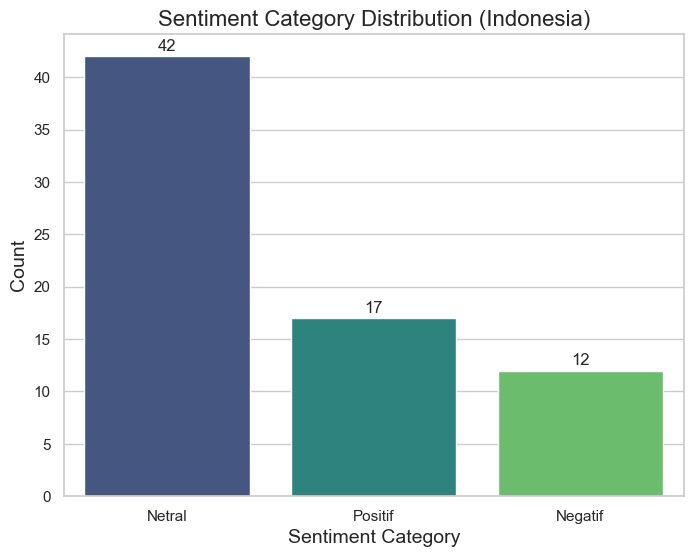

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [26]:
pip install wordcloud

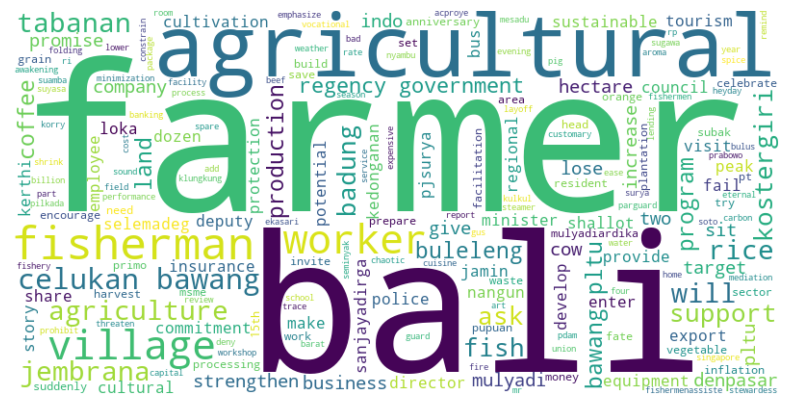

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

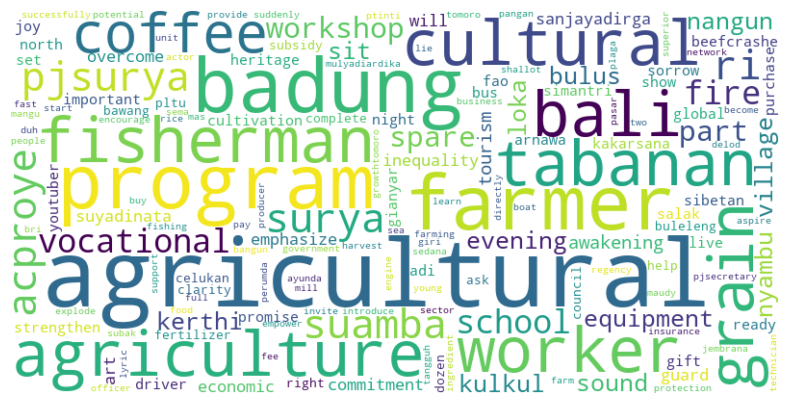

In [28]:
# Sentimen Positif
data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

# Create a word cloud
wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

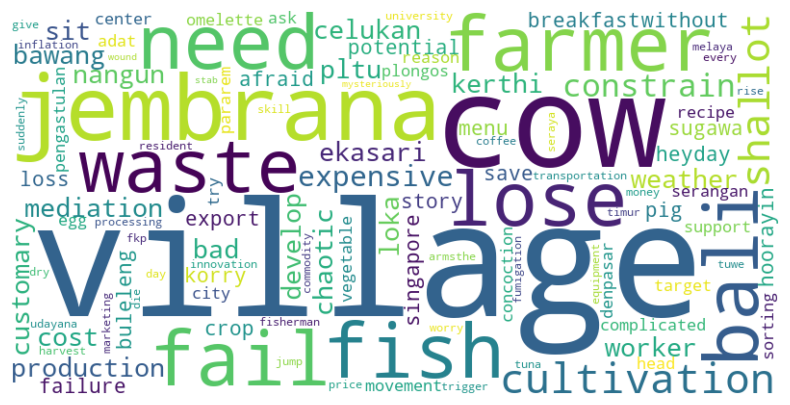

In [29]:
# Sentimen Negatif
data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

# Create a word cloud
wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

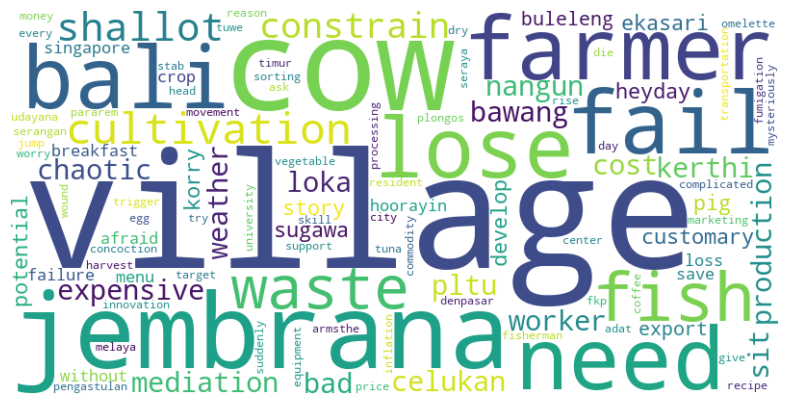

In [30]:
# Sentimen Netral
data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

# Create a word cloud
wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

### 2. VADER

#### Sentiment

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_7612\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [33]:
data_sentiment1.head()

keyword                                   title_translated  \
0     bawang  The cultivation of shallots is constrained by ...   
1     bawang  The chaotic mediation of the Celukan Bawang PL...   
2     bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  pertanian  Support the minimization of carbon traces, ban...   
4  pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  sentiment_score_english  \
0  the cultivation of shallot be constrain by exp...                     -0.6   
1  the chaotic mediation of the celukan bawang pl...                     -0.5   
2  dozen of pltu celukan bawang mesadu worker to ...                      0.0   
3  support the minimization of carbon trace banki...                      0.0   
4  pjsurya surya suamba acproye to the worker of ...                      0.3   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Negatif                        -0.5423   
1                    Negatif                        -0.7717   
2                     Netral                         0.0000   
3                     Netral                         0.4019   
4                    Positif                         0.0000   

  sentiment_category_english_vader  
0                          Negatif  
1                          Negatif  
2                           Netral  
3                          Positif  
4                           Netral

In [34]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    31
Netral     27
Negatif    13
Name: count, dtype: int64

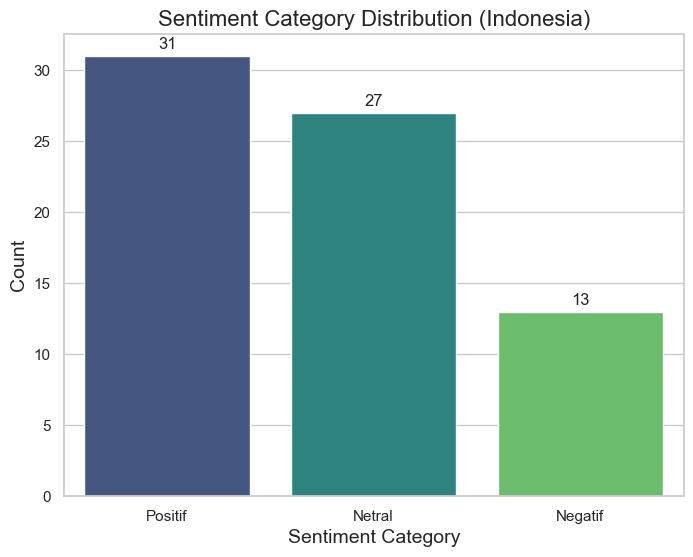

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

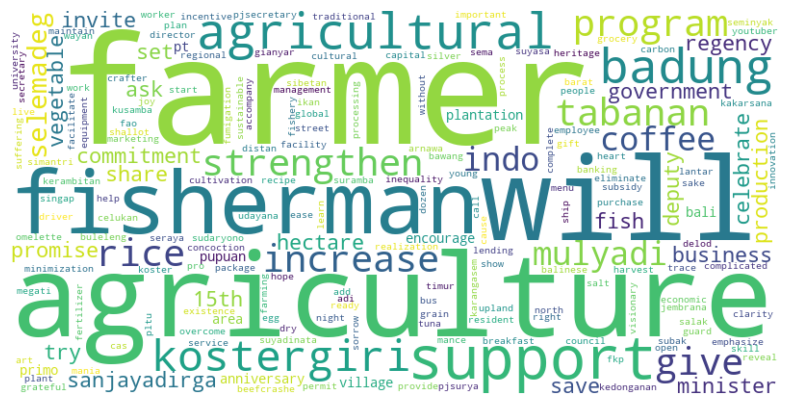

In [36]:
# Sentimen Positif
data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

# Create a word cloud
wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

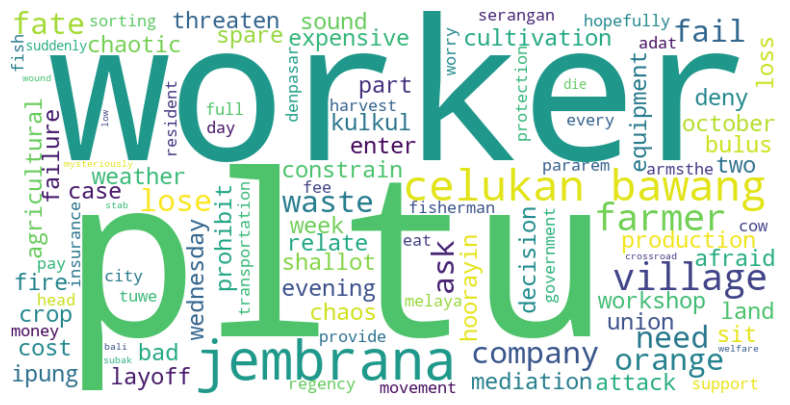

In [37]:
# Sentimen Negatif
data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

# Create a word cloud
wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

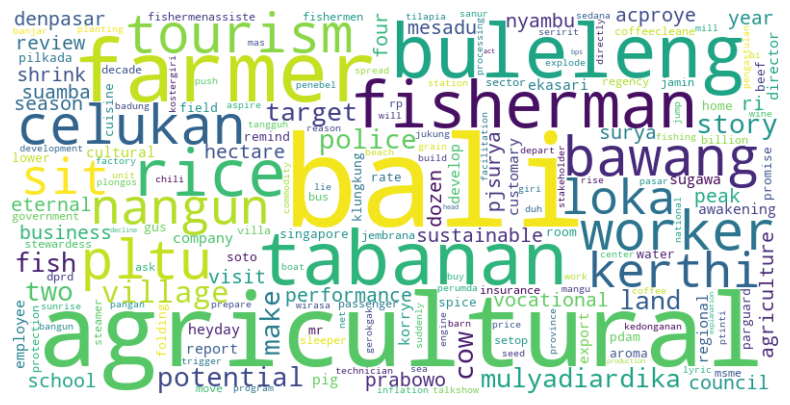

In [38]:
# Sentimen Netral
data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

# Create a word cloud
wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

### 3. IndoBERT

#### Sentiment

In [39]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [40]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0       bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1       bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2       bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3    pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4    pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..         ...                                                ...   
66      petani  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67      petani  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68        padi  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69        padi  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70  perkebunan  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                              content  
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
..                                                ...  
66                                           Politika  
67                                           Politika  
68                                Ekonomi & Perbankan  
69                                               Bali  
70                                           Politika  

[71 rows x 4 columns]

In [41]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [42]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_7612\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0       bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1       bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2       bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3    pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4    pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..         ...                                                ...   
66      petani  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67      petani  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68        padi  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69        padi  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70  perkebunan  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                              content  \
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   
..                                                ...   
66                                           Politika   
67                                           Politika   
68                                Ekonomi & Perbankan   
69                                               Bali   
70                                           Politika   

    sentiment_score_indonesia sentiment_category_indonesia  
0                    0.884090                      negatif  
1                    0.988850                       netral  
2                    0.997202                       netral  
3                    0.990256                       netral  
4                    0.997370                       netral  
..                        ...                          ...  
66                   0.994290                       netral  
67                   0.970316                       netral  
68                   0.991558                       netral  
69                   0.993977                       netral  
70                   0.996910                       netral  

[71 rows x 6 columns]

In [43]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     58
positif     9
negatif     4
Name: count, dtype: int64

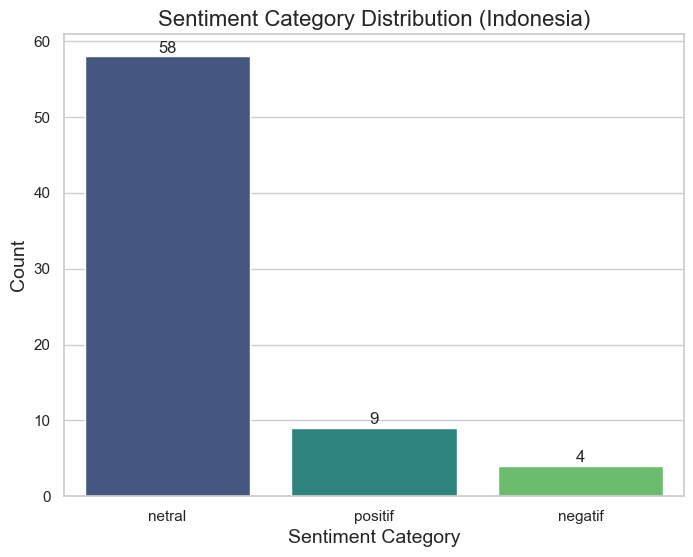

In [44]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

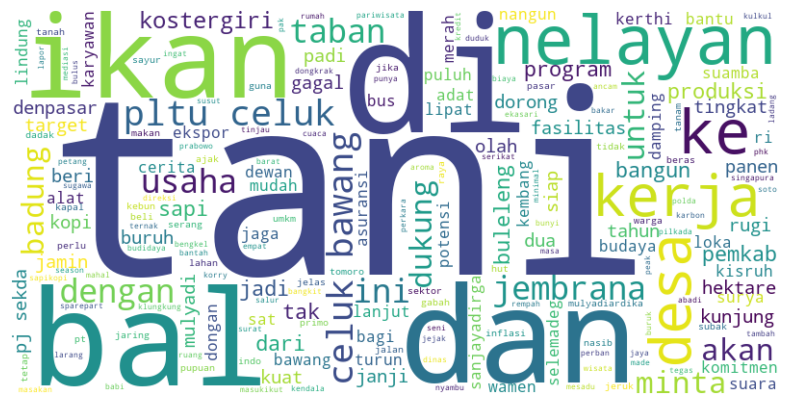

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

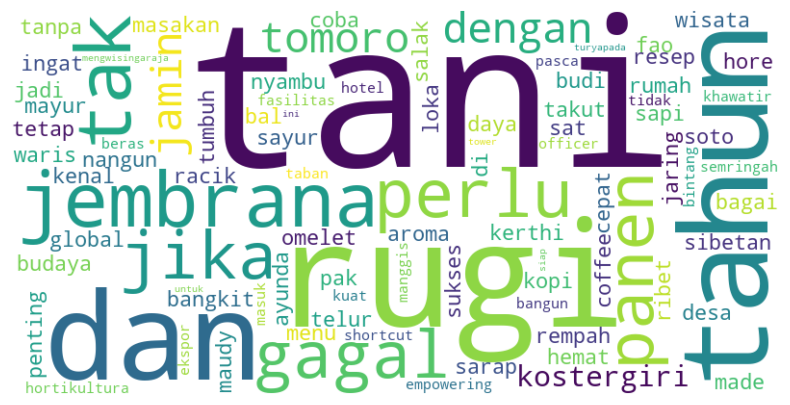

In [46]:
# Sentimen Positif
data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

# Create a word cloud
wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

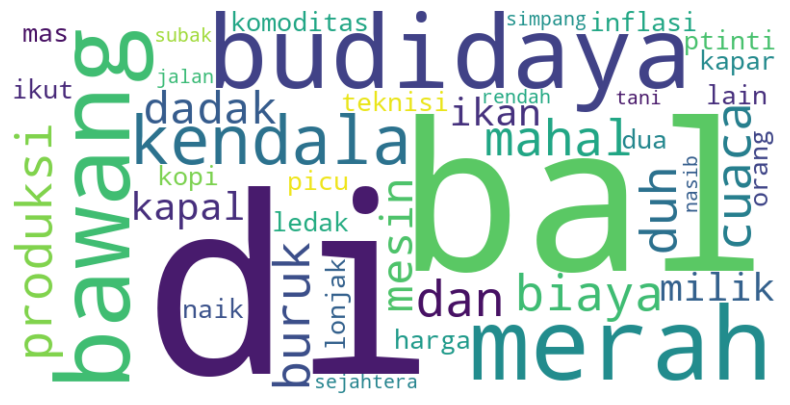

In [47]:
# Sentimen Negatif
data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

# Create a word cloud
wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

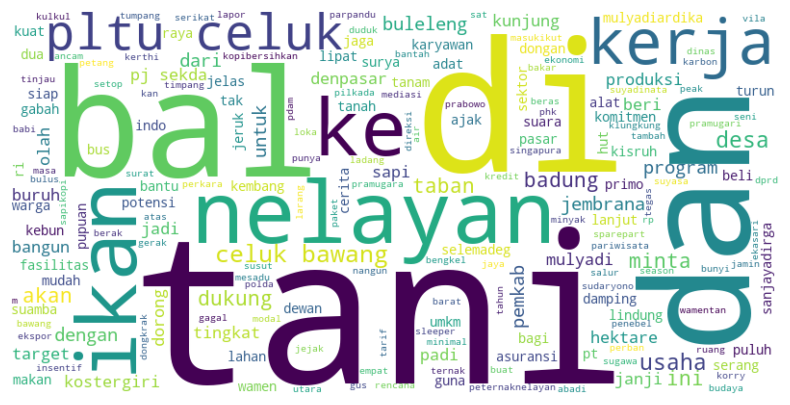

In [48]:
# Sentimen Netral
data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

# Create a word cloud
wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

### Export Result

In [49]:
print(data_sentiment1.shape)
data_sentiment1.head()

(71, 7)


keyword                                   title_translated  \
0     bawang  The cultivation of shallots is constrained by ...   
1     bawang  The chaotic mediation of the Celukan Bawang PL...   
2     bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  pertanian  Support the minimization of carbon traces, ban...   
4  pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  sentiment_score_english  \
0  the cultivation of shallot be constrain by exp...                     -0.6   
1  the chaotic mediation of the celukan bawang pl...                     -0.5   
2  dozen of pltu celukan bawang mesadu worker to ...                      0.0   
3  support the minimization of carbon trace banki...                      0.0   
4  pjsurya surya suamba acproye to the worker of ...                      0.3   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Negatif                        -0.5423   
1                    Negatif                        -0.7717   
2                     Netral                         0.0000   
3                     Netral                         0.4019   
4                    Positif                         0.0000   

  sentiment_category_english_vader  
0                          Negatif  
1                          Negatif  
2                           Netral  
3                          Positif  
4                           Netral

In [50]:
print(data_sentiment2.shape)
data_sentiment2.head()

(71, 6)


keyword                                              title  \
0     bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1     bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2     bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3  pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4  pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.884090                      negatif  
1                   0.988850                       netral  
2                   0.997202                       netral  
3                   0.990256                       netral  
4                   0.997370                       netral

In [51]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(71, 12)


keyword                                              title  \
0     bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1     bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2     bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3  pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4  pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.884090                      negatif   
1                   0.988850                       netral   
2                   0.997202                       netral   
3                   0.990256                       netral   
4                   0.997370                       netral   

                                    title_translated  \
0  The cultivation of shallots is constrained by ...   
1  The chaotic mediation of the Celukan Bawang PL...   
2  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  Support the minimization of carbon traces, ban...   
4  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  \
0  the cultivation of shallot be constrain by exp...   
1  the chaotic mediation of the celukan bawang pl...   
2  dozen of pltu celukan bawang mesadu worker to ...   
3  support the minimization of carbon trace banki...   
4  pjsurya surya suamba acproye to the worker of ...   

  sentiment_category_english  sentiment_score_english  \
0                    Negatif                     -0.6   
1                    Negatif                     -0.5   
2                     Netral                      0.0   
3                     Netral                      0.0   
4                    Positif                      0.3   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Negatif                        -0.5423  
1                          Negatif                        -0.7717  
2                           Netral                         0.0000  
3                          Positif                         0.4019  
4                           Netral                         0.0000

In [52]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor1_triwulan4_bali.xlsx")

## Sentimen Decision + Word Cloud + Export Result

In [53]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title    keyword  \
0           0  Budidaya Bawang Merah Terkendala Biaya Produks...     bawang   
1           1     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal     bawang   
2           2  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...     bawang   
3           3  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...  pertanian   
4           4  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...  pertanian   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                           input_ids  \
0  [3, 11465, 9539, 3544, 9915, 3592, 3506, 6612,...   
1  [3, 24045, 31376, 4231, 25930, 5401, 1532, 953...   
2  [3, 5495, 2533, 25930, 5401, 1532, 9539, 2009,...   
3  [3, 17543, 7625, 8923, 8089, 2632, 1476, 2319,...   
4  [3, 15558, 1631, 1808, 6909, 21664, 3867, 7412...   

                                    title_translated  \
0  The cultivation of shallots is constrained by ...   
1  The chaotic mediation of the Celukan Bawang PL...   
2  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  Support the minimization of carbon traces, ban...   
4  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  
0  the cultivation of shallot be constrain by exp...  
1  the chaotic mediation of the celukan bawang pl...  
2  dozen of pltu celukan bawang mesadu worker to ...  
3  support the minimization of carbon trace banki...  
4  pjsurya surya suamba acproye to the worker of ...

### 1. TextBlob

#### Sentiment

In [54]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [55]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0       bawang  The cultivation of shallots is constrained by ...   
1       bawang  The chaotic mediation of the Celukan Bawang PL...   
2       bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3    pertanian  Support the minimization of carbon traces, ban...   
4    pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   
..         ...                                                ...   
66      petani  Koster-Giri will build a wine processing facto...   
67      petani  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
68        padi  From the Talkshow Wirasa Stakeholders 2024 BI ...   
69        padi  Rice production in Bali declined, this is the ...   
70  perkebunan  80 percent of the target of votes, Mulyadi cam...   

                             cleaned_title_translated  
0   the cultivation of shallot be constrain by exp...  
1   the chaotic mediation of the celukan bawang pl...  
2   dozen of pltu celukan bawang mesadu worker to ...  
3   support the minimization of carbon trace banki...  
4   pjsurya surya suamba acproye to the worker of ...  
..                                                ...  
66  kostergiri will build a wine processing factor...  
67  support bali farmer and msme abdi denpasar enc...  
68  from the talkshow wirasa stakeholder 2024 bi b...  
69  rice production in bali decline this be the ex...  
70  80 percent of the target of vote mulyadi campa...  

[71 rows x 3 columns]

In [56]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_7612\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [57]:
data_sentiment1

keyword                                   title_translated  \
0       bawang  The cultivation of shallots is constrained by ...   
1       bawang  The chaotic mediation of the Celukan Bawang PL...   
2       bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3    pertanian  Support the minimization of carbon traces, ban...   
4    pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   
..         ...                                                ...   
66      petani  Koster-Giri will build a wine processing facto...   
67      petani  Supporting Bali Farmers and MSMEs, Abdi Denpas...   
68        padi  From the Talkshow Wirasa Stakeholders 2024 BI ...   
69        padi  Rice production in Bali declined, this is the ...   
70  perkebunan  80 percent of the target of votes, Mulyadi cam...   

                             cleaned_title_translated  \
0   the cultivation of shallot be constrain by exp...   
1   the chaotic mediation of the celukan bawang pl...   
2   dozen of pltu celukan bawang mesadu worker to ...   
3   support the minimization of carbon trace banki...   
4   pjsurya surya suamba acproye to the worker of ...   
..                                                ...   
66  kostergiri will build a wine processing factor...   
67  support bali farmer and msme abdi denpasar enc...   
68  from the talkshow wirasa stakeholder 2024 bi b...   
69  rice production in bali decline this be the ex...   
70  80 percent of the target of vote mulyadi campa...   

    sentiment_score_english sentiment_category_english  
0                      -0.6                    Negatif  
1                      -0.5                    Negatif  
2                       0.0                     Netral  
3                       0.0                     Netral  
4                       0.3                    Positif  
..                      ...                        ...  
66                      0.0                     Netral  
67                      0.0                     Netral  
68                      0.0                     Netral  
69                      0.0                     Netral  
70                      0.0                     Netral  

[71 rows x 5 columns]

In [58]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     42
Positif    17
Negatif    12
Name: count, dtype: int64

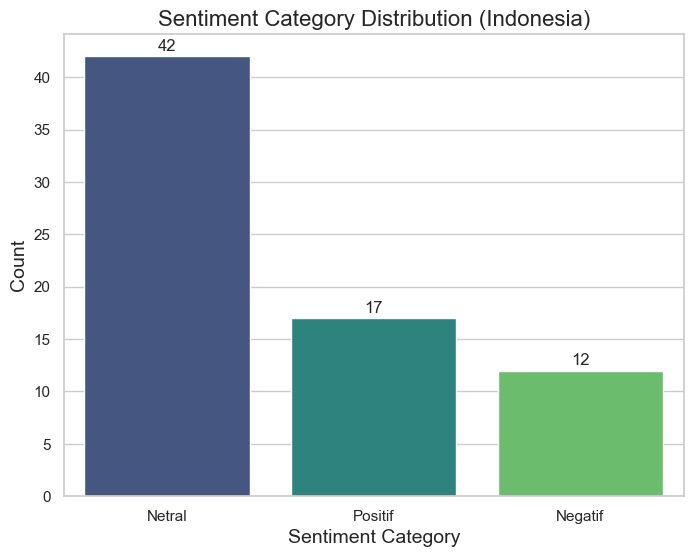

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [65]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


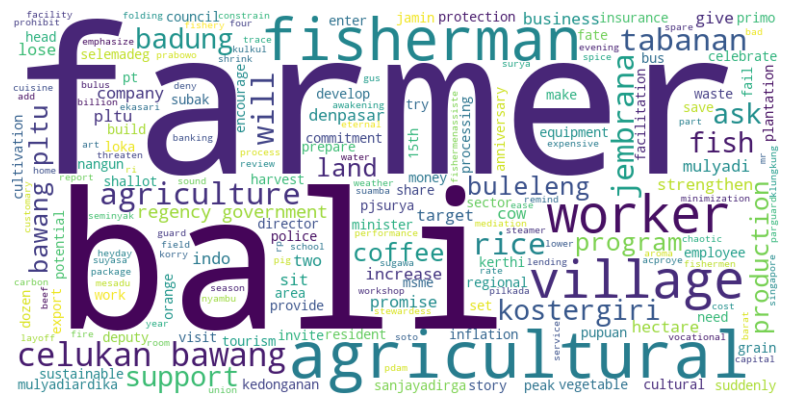

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

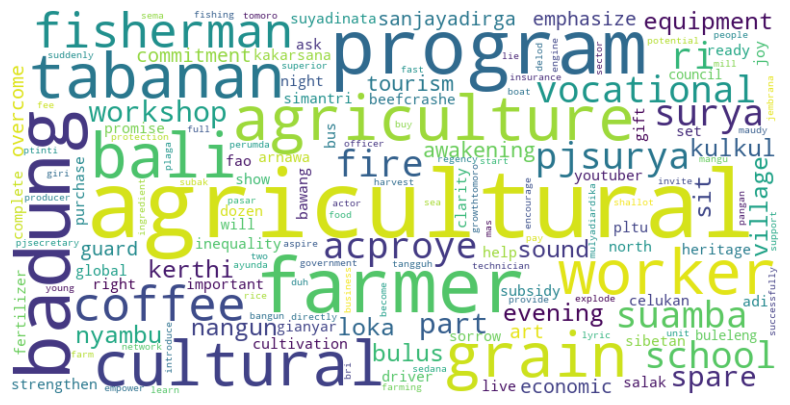

In [67]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

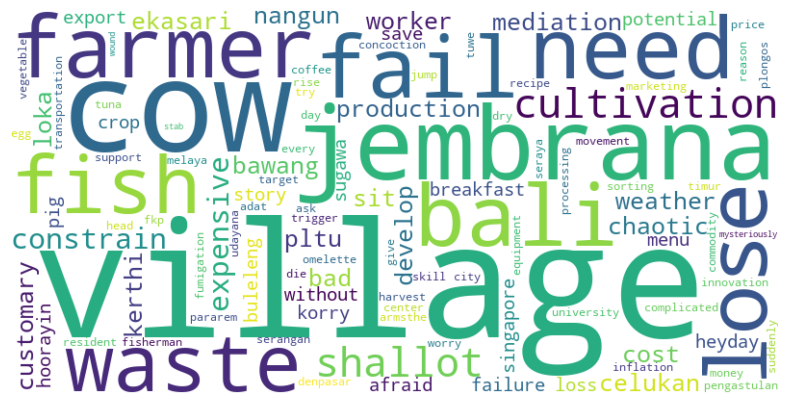

In [68]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

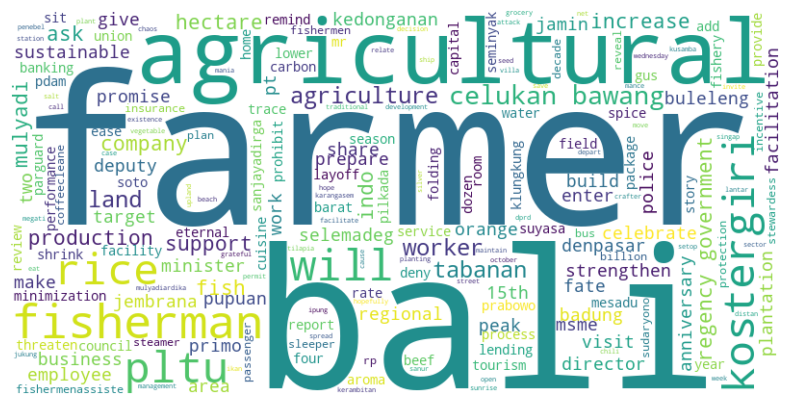

In [69]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_7612\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [72]:
data_sentiment1.head()

keyword                                   title_translated  \
0     bawang  The cultivation of shallots is constrained by ...   
1     bawang  The chaotic mediation of the Celukan Bawang PL...   
2     bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  pertanian  Support the minimization of carbon traces, ban...   
4  pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  sentiment_score_english  \
0  the cultivation of shallot be constrain by exp...                     -0.6   
1  the chaotic mediation of the celukan bawang pl...                     -0.5   
2  dozen of pltu celukan bawang mesadu worker to ...                      0.0   
3  support the minimization of carbon trace banki...                      0.0   
4  pjsurya surya suamba acproye to the worker of ...                      0.3   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Negatif                        -0.5423   
1                    Negatif                        -0.7717   
2                     Netral                         0.0000   
3                     Netral                         0.4019   
4                    Positif                         0.0000   

  sentiment_category_english_vader  
0                          Negatif  
1                          Negatif  
2                           Netral  
3                          Positif  
4                           Netral

In [73]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    31
Netral     27
Negatif    13
Name: count, dtype: int64

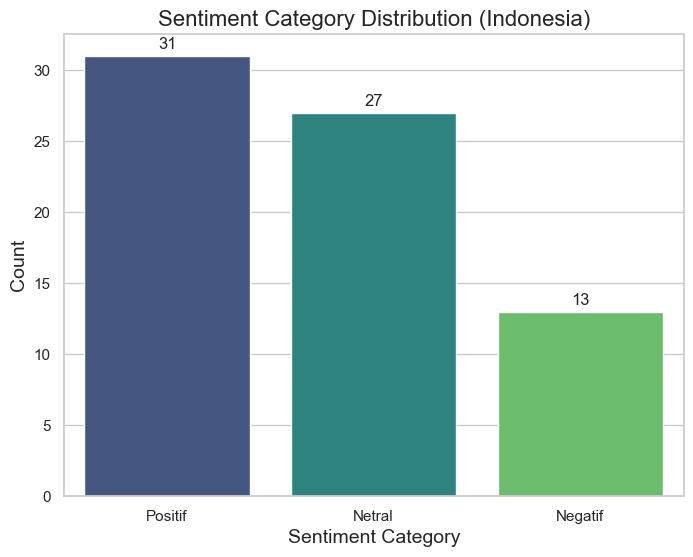

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

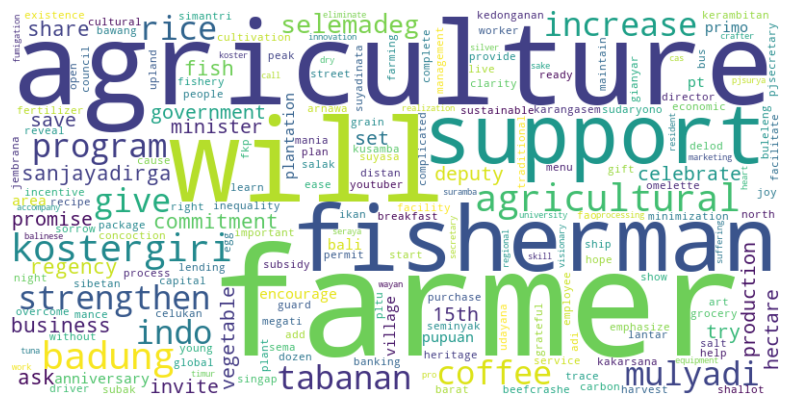

In [75]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

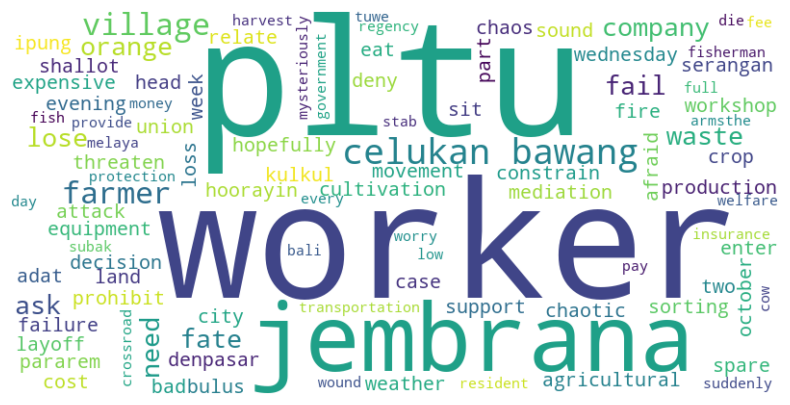

In [76]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

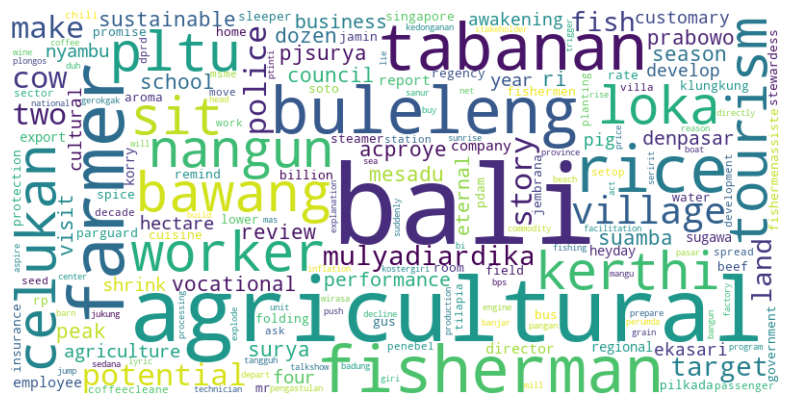

In [77]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [85]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [86]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0       bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1       bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2       bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3    pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4    pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..         ...                                                ...   
66      petani  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67      petani  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68        padi  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69        padi  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70  perkebunan  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                              content  
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...  
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...  
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...  
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...  
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...  
..                                                ...  
66                                           Politika  
67                                           Politika  
68                                Ekonomi & Perbankan  
69                                               Bali  
70                                           Politika  

[71 rows x 4 columns]

In [87]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [88]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_7612\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_7612\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0       bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1       bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2       bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3    pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4    pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   
..         ...                                                ...   
66      petani  Koster-Giri akan Bangun Pabrik Pengolahan Angg...   
67      petani  Dukung Petani dan UMKM Bali, ABDI Denpasar Dor...   
68        padi  Dari Talkshow Temu Wirasa Stakeholders 2024 BI...   
69        padi  Produksi Padi di Bali Menurun, Ini Penjelasan ...   
70  perkebunan  Target Suara 80 Persen, Mulyadi Kampanye di De...   

                                        cleaned_title  \
0   budidaya bawang merah kendala biaya produksi m...   
1        mediasi kisruh buruh pltu celuk bawang gagal   
2   puluh kerja pltu celuk bawang mesadu ke dewan ...   
3   dukung minimal jejak karbon perban salur kredi...   
4   pj sekda surya suamba damping kunjung kerja wa...   
..                                                ...   
66  kostergiri akan bangun pabrik olah anggur di b...   
67  dukung tani dan umkm bal abdi denpasar dorong ...   
68  dari talkshow temu wirasa stakeholders bi bal ...   
69  produksi padi di bal turun ini jelas plt kepal...   
70  target suara persen mulyadi kampanye di desa s...   

                                              content  \
0   MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1   SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2   SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3   MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4   MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   
..                                                ...   
66                                           Politika   
67                                           Politika   
68                                Ekonomi & Perbankan   
69                                               Bali   
70                                           Politika   

    sentiment_score_indonesia sentiment_category_indonesia  
0                    0.884090                      negatif  
1                    0.988850                       netral  
2                    0.997202                       netral  
3                    0.990256                       netral  
4                    0.997370                       netral  
..                        ...                          ...  
66                   0.994290                       netral  
67                   0.970316                       netral  
68                   0.991558                       netral  
69                   0.993977                       netral  
70                   0.996910                       netral  

[71 rows x 6 columns]

In [89]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     58
positif     9
negatif     4
Name: count, dtype: int64

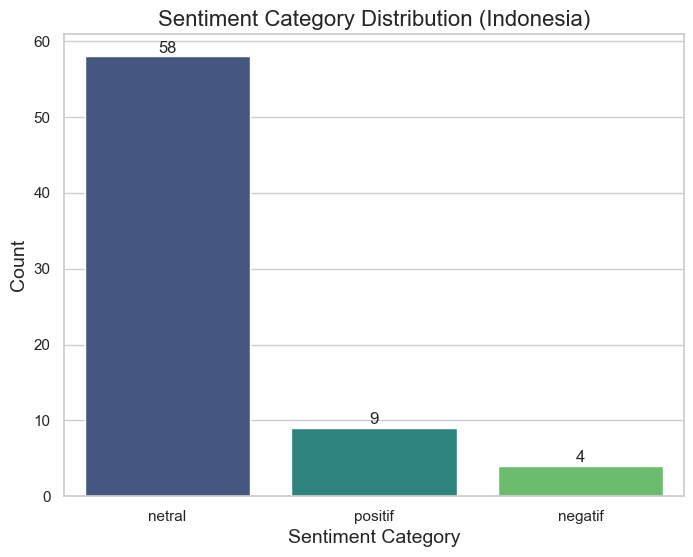

In [90]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

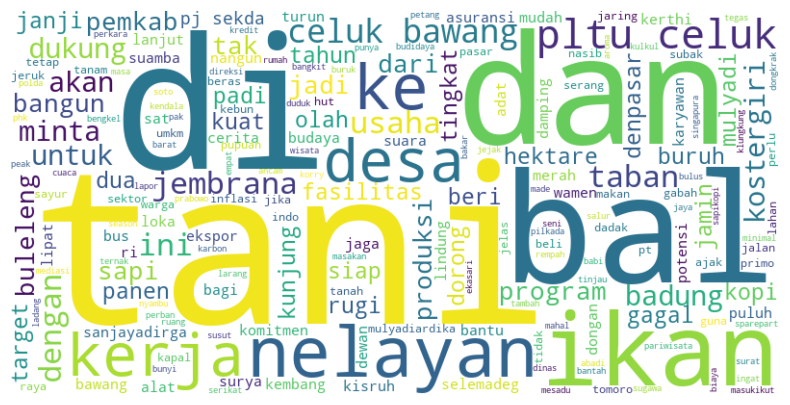

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

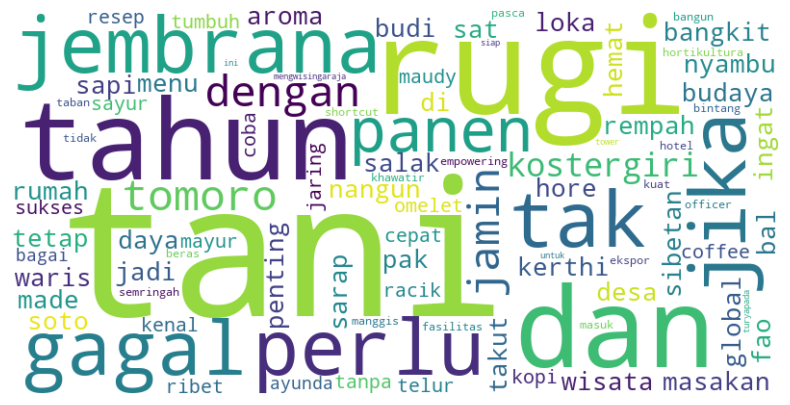

In [92]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

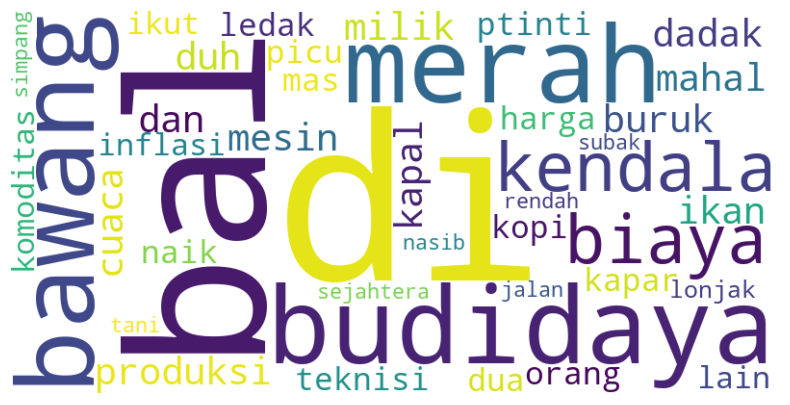

In [93]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

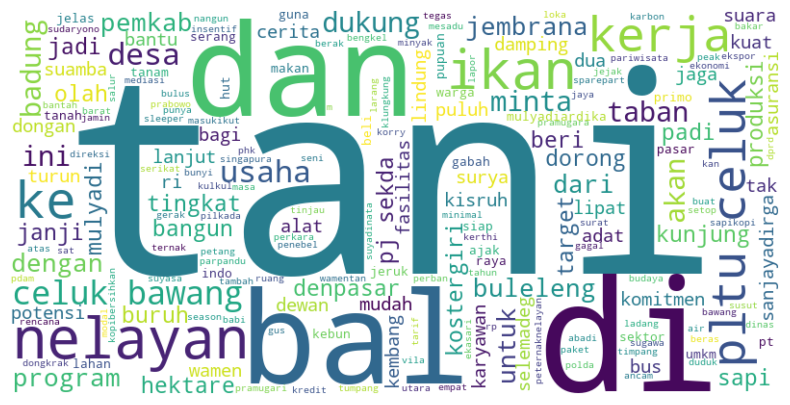

In [94]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [ ]:
print(data_sentiment1.shape)
data_sentiment1.head()

(71, 7)


keyword                                   title_translated  \
0     bawang  The cultivation of shallots is constrained by ...   
1     bawang  The chaotic mediation of the Celukan Bawang PL...   
2     bawang  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  pertanian  Support the minimization of carbon traces, ban...   
4  pertanian  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  sentiment_score_english  \
0  the cultivation of shallot be constrain by exp...                     -0.6   
1  the chaotic mediation of the celukan bawang pl...                     -0.5   
2  dozen of pltu celukan bawang mesadu worker to ...                      0.0   
3  support the minimization of carbon trace banki...                      0.0   
4  pjsurya surya suamba acproye to the worker of ...                      0.3   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Negatif                        -0.5423   
1                    Negatif                        -0.7717   
2                     Netral                         0.0000   
3                     Netral                         0.4019   
4                    Positif                         0.0000   

  sentiment_category_english_vader  
0                          Negatif  
1                          Negatif  
2                           Netral  
3                          Positif  
4                           Netral

In [ ]:
print(data_sentiment2.shape)
data_sentiment2.head()

(71, 6)


keyword                                              title  \
0     bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1     bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2     bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3  pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4  pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.884090                      negatif  
1                   0.988850                       netral  
2                   0.997202                       netral  
3                   0.990256                       netral  
4                   0.997370                       netral

In [ ]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(71, 12)


keyword                                              title  \
0     bawang  Budidaya Bawang Merah Terkendala Biaya Produks...   
1     bawang     Mediasi Kisruh Buruh PLTU Celukan Bawang Gagal   
2     bawang  Puluhan Pekerja PLTU Celukan Bawang Mesadu ke ...   
3  pertanian  Dukung Minimalisasi Jejak Karbon, Perbankan Sa...   
4  pertanian  Pj. Sekda Surya Suamba Dampingi Kunjungan Kerj...   

                                       cleaned_title  \
0  budidaya bawang merah kendala biaya produksi m...   
1       mediasi kisruh buruh pltu celuk bawang gagal   
2  puluh kerja pltu celuk bawang mesadu ke dewan ...   
3  dukung minimal jejak karbon perban salur kredi...   
4  pj sekda surya suamba damping kunjung kerja wa...   

                                             content  \
0  MANGUPURA, BALIPOST.com - Budidaya bawang mera...   
1  SINGARAJA, BALIPOST.com - Mediasi kisruh buruh...   
2  SINGARAJA, BALIPOST.com - Puluhan Pekerja di P...   
3  MANGUPURA, BALIPOST.com - Pertanian berkelanju...   
4  MANGUPURA, BALIPOST.com - Penjabat (Pj.) Sekda...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.884090                      negatif   
1                   0.988850                       netral   
2                   0.997202                       netral   
3                   0.990256                       netral   
4                   0.997370                       netral   

                                    title_translated  \
0  The cultivation of shallots is constrained by ...   
1  The chaotic mediation of the Celukan Bawang PL...   
2  Dozens of PLTU Celukan Bawang Mesadu workers t...   
3  Support the minimization of carbon traces, ban...   
4  PJ.SURYA SURYA SUAMBA ACPROYED TO THE WORKERS ...   

                            cleaned_title_translated  \
0  the cultivation of shallot be constrain by exp...   
1  the chaotic mediation of the celukan bawang pl...   
2  dozen of pltu celukan bawang mesadu worker to ...   
3  support the minimization of carbon trace banki...   
4  pjsurya surya suamba acproye to the worker of ...   

  sentiment_category_english  sentiment_score_english  \
0                    Negatif                     -0.6   
1                    Negatif                     -0.5   
2                     Netral                      0.0   
3                     Netral                      0.0   
4                    Positif                      0.3   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Negatif                        -0.5423  
1                          Negatif                        -0.7717  
2                           Netral                         0.0000  
3                          Positif                         0.4019  
4                           Netral                         0.0000

In [ ]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor2_triwulan4_bali.xlsx")